# Machine Learning Engineer Nanodegree

## Udacity Capston Project: Home Credit

Author: Omar Villa

Date: November 2nd 2018

## Definition

### Overview

Home Credit strives to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience. In order to make sure this underserved population has a positive loan experience, Home Credit makes use of a variety of alternative data--including telco and transactional information--to predict their clients' repayment abilities.

While Home Credit is currently using various statistical and machine learning methods to make these predictions, they're challenging Kagglers to help them unlock the full potential of their data. Doing so will ensure that clients capable of repayment are not rejected and that loans are given with a principal, maturity, and repayment calendar that will empower their clients to be successful

### Problem Statement

The Home Credit Default Risk competition is a supervised classification machine learning task. The objective is to use historical financial and socioeconomic data to predict whether or not an applicant or client will be able to repay the loan. This is a standard supervised classification task:

•	Supervised: The labels are included in the training data and the goal is to train a model to learn and predict the labels from the features

•	Classification: The label is a binary variable, 0 (will repay loan on time), 1 (will have difficulty repaying the loan)

The final application is expected to predict when or who are the best candidates for credit loan

### Metrics

Our evaluation metrics will be based in a ROC Curve because is what the competition specification requests but for learning purpose we will also include a Confusion Metrix to compare results.

[[1] Understanding AUC - ROC Curve](https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5)

The target metric will be "TARGET" under the application_train/test datasets,
results are based on loan payed or not payed

## Table of Contents

[I. Data Exploration](#I.-Data-Exploration)

[II. Exploratory Visualization](#II.-Exploratory-Visualization)

[III. Algorithms and Techniques](#III.-Algorithms-and-Techniques)

[IV. Data Preprocessing](#IV.-Data-Preprocessing)

[V. Implementation](#V.-Implementation)

[VI. Refinement](#VI.-Refinement)

[VII. Results](#VII.-Results)

[VIII. Submitting to Kaggle](#VIII.-Submitting-to-Kaggle)

## Analysis

### I. Data Exploration

application_{train|test}.csv

This is the main table, broken into two files for Train (with TARGET) and Test (without TARGET).
Static data for all applications. One row represents one loan in our data sample.

bureau.csv

All client's previous credits provided by other financial institutions that were reported to Credit Bureau (for clients who have a loan in our sample).
For every loan in our sample, there are as many rows as number of credits the client had in Credit Bureau before the application date.

bureau_balance.csv

Monthly balances of previous credits in Credit Bureau.
This table has one row for each month of history of every previous credit reported to Credit Bureau – i.e the table has (#loans in sample * # of relative previous credits * # of months where we have some history observable for the previous credits) rows.

POS_CASH_balance.csv

Monthly balance snapshots of previous POS (point of sales) and cash loans that the applicant had with Home Credit.
This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credits * # of months in which we have some history observable for the previous credits) rows.

credit_card_balance.csv

Monthly balance snapshots of previous credit cards that the applicant has with Home Credit.
This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credit cards * # of months where we have some history observable for the previous credit card) rows.

previous_application.csv

All previous applications for Home Credit loans of clients who have loans in our sample.
There is one row for each previous application related to loans in our data sample.

installments_payments.csv

Repayment history for the previously disbursed credits in Home Credit related to the loans in our sample.
There is a) one row for every payment that was made plus b) one row each for missed payment.
One row is equivalent to one payment of one installment OR one installment corresponding to one payment of one previous Home Credit credit related to loans in our sample.

HomeCredit_columns_description.csv

This file contains descriptions for the columns in the various data files.

![Data Table Diagram](img/homecredit.png "Data Table Diagram")

In [1]:
# Libraries list
# Tools
import numpy as np
import os
import warnings
import visuals as vs
warnings.filterwarnings('ignore')

# Data management
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
from IPython.display import display

# Preparation
from sklearn.preprocessing import LabelEncoder, Imputer, MinMaxScaler
from sklearn.model_selection import GridSearchCV

# Models
from sklearn.linear_model import LogisticRegression

# Validation


In [2]:
# Display matplotlib plots inline in this notebook.
%matplotlib inline

# Configure style of plots
plt.style.use('ggplot')
# Make plots smaller
sns.set_context('paper')  

# Have all columns appear when dataframes are displayed.
pd.set_option('display.max_columns', None) 
# Have 50 rows appear when a dataframe is displayed
pd.set_option('display.max_rows', 50)
# Display dimensions whenever a dataframe is printed out.
pd.set_option('display.show_dimensions', True)

In [3]:
# Load main datasets
application_train_data = pd.read_csv("Data/application_train.csv")
application_test_data = pd.read_csv("Data/application_test.csv")

In [4]:
# Load other datasets
#previous_application_data = pd.read_csv("D:/Datasets/HomeCredit/previous_application.csv")
#POS_CASH_balance_data = pd.read_csv("D:/Datasets/HomeCredit/POS_CASH_balance.csv")
#installments_payments_data = pd.read_csv("D:/Datasets/HomeCredit/installments_payments.csv")
#credit_card_balance_data = pd.read_csv("D:/Datasets/HomeCredit/credit_card_balance.csv")

### 1. Main tables description and info (application_{train|test}.csv

In [5]:
print ("Total number of Rows and Cols for application_train: {}".format(application_train_data.shape))
print ("Total number of Rows and Cols for application_test : {}".format(application_test_data.shape))

Total number of Rows and Cols for application_train: (307511, 122)
Total number of Rows and Cols for application_test : (48744, 121)


We can notice there is a difference of 1 feature between train and test datasets, this is due the TARGET feature that is included in the training data but not in test. See below statistical description of each feature

In [6]:
application_train_data.describe().head().transpose()

count           mean            std  \
SK_ID_CURR                   307511.0  278180.518577  102790.175348   
TARGET                       307511.0       0.080729       0.272419   
CNT_CHILDREN                 307511.0       0.417052       0.722121   
AMT_INCOME_TOTAL             307511.0  168797.919297  237123.146279   
AMT_CREDIT                   307511.0  599025.999706  402490.776996   
AMT_ANNUITY                  307499.0   27108.573909   14493.737315   
AMT_GOODS_PRICE              307233.0  538396.207429  369446.460540   
REGION_POPULATION_RELATIVE   307511.0       0.020868       0.013831   
DAYS_BIRTH                   307511.0  -16036.995067    4363.988632   
DAYS_EMPLOYED                307511.0   63815.045904  141275.766519   
DAYS_REGISTRATION            307511.0   -4986.120328    3522.886321   
DAYS_ID_PUBLISH              307511.0   -2994.202373    1509.450419   
OWN_CAR_AGE                  104582.0      12.061091      11.944812   
FLAG_MOBIL                   307511.0       0.999997       0.001803   
FLAG_EMP_PHONE               307511.0       0.819889       0.384280   
FLAG_WORK_PHONE              307511.0       0.199368       0.399526   
FLAG_CONT_MOBILE             307511.0       0.998133       0.043164   
FLAG_PHONE                   307511.0       0.281066       0.449521   
FLAG_EMAIL                   307511.0       0.056720       0.231307   
CNT_FAM_MEMBERS              307509.0       2.152665       0.910682   
REGION_RATING_CLIENT         307511.0       2.052463       0.509034   
REGION_RATING_CLIENT_W_CITY  307511.0       2.031521       0.502737   
HOUR_APPR_PROCESS_START      307511.0      12.063419       3.265832   
REG_REGION_NOT_LIVE_REGION   307511.0       0.015144       0.122126   
REG_REGION_NOT_WORK_REGION   307511.0       0.050769       0.219526   
...                               ...            ...            ...   
FLAG_DOCUMENT_3              307511.0       0.710023       0.453752   
FLAG_DOCUMENT_4              307511.0       0.000081       0.009016   
FLAG_DOCUMENT_5              307511.0       0.015115       0.122010   
FLAG_DOCUMENT_6              307511.0       0.088055       0.283376   
FLAG_DOCUMENT_7              307511.0       0.000192       0.013850   
FLAG_DOCUMENT_8              307511.0       0.081376       0.273412   
FLAG_DOCUMENT_9              307511.0       0.003896       0.062295   
FLAG_DOCUMENT_10             307511.0       0.000023       0.004771   
FLAG_DOCUMENT_11             307511.0       0.003912       0.062424   
FLAG_DOCUMENT_12             307511.0       0.000007       0.002550   
FLAG_DOCUMENT_13             307511.0       0.003525       0.059268   
FLAG_DOCUMENT_14             307511.0       0.002936       0.054110   
FLAG_DOCUMENT_15             307511.0       0.001210       0.034760   
FLAG_DOCUMENT_16             307511.0       0.009928       0.099144   
FLAG_DOCUMENT_17             307511.0       0.000267       0.016327   
FLAG_DOCUMENT_18             307511.0       0.008130       0.089798   
FLAG_DOCUMENT_19             307511.0       0.000595       0.024387   
FLAG_DOCUMENT_20             307511.0       0.000507       0.022518   
FLAG_DOCUMENT_21             307511.0       0.000335       0.018299   
AMT_REQ_CREDIT_BUREAU_HOUR   265992.0       0.006402       0.083849   
AMT_REQ_CREDIT_BUREAU_DAY    265992.0       0.007000       0.110757   
AMT_REQ_CREDIT_BUREAU_WEEK   265992.0       0.034362       0.204685   
AMT_REQ_CREDIT_BUREAU_MON    265992.0       0.267395       0.916002   
AMT_REQ_CREDIT_BUREAU_QRT    265992.0       0.265474       0.794056   
AMT_REQ_CREDIT_BUREAU_YEAR   265992.0       1.899974       1.869295   

                                      min            25%  
SK_ID_CURR                   100002.00000  189145.500000  
TARGET                            0.00000       0.000000  
CNT_CHILDREN                      0.00000       0.000000  
AMT_INCOME_TOTAL              25650.00000  112500.000000  
AMT_CREDIT                    45000.00000  2

In [7]:
# Notice TARGET feature is missing in the test dataset
application_test_data.describe().head().transpose()

count           mean            std  \
SK_ID_CURR                   48744.0  277796.676350  103169.547296   
CNT_CHILDREN                 48744.0       0.397054       0.709047   
AMT_INCOME_TOTAL             48744.0  178431.805855  101522.591536   
AMT_CREDIT                   48744.0  516740.435561  365397.004174   
AMT_ANNUITY                  48720.0   29426.240209   16016.368315   
AMT_GOODS_PRICE              48744.0  462618.840473  336710.215040   
REGION_POPULATION_RELATIVE   48744.0       0.021226       0.014428   
DAYS_BIRTH                   48744.0  -16068.084605    4325.900393   
DAYS_EMPLOYED                48744.0   67485.366322  144348.507136   
DAYS_REGISTRATION            48744.0   -4967.652716    3552.612035   
DAYS_ID_PUBLISH              48744.0   -3051.712949    1569.276709   
OWN_CAR_AGE                  16432.0      11.786027      11.462889   
FLAG_MOBIL                   48744.0       0.999979       0.004529   
FLAG_EMP_PHONE               48744.0       0.809720       0.392526   
FLAG_WORK_PHONE              48744.0       0.204702       0.403488   
FLAG_CONT_MOBILE             48744.0       0.998400       0.039971   
FLAG_PHONE                   48744.0       0.263130       0.440337   
FLAG_EMAIL                   48744.0       0.162646       0.369046   
CNT_FAM_MEMBERS              48744.0       2.146767       0.890423   
REGION_RATING_CLIENT         48744.0       2.038159       0.522694   
REGION_RATING_CLIENT_W_CITY  48744.0       2.012596       0.515804   
HOUR_APPR_PROCESS_START      48744.0      12.007365       3.278172   
REG_REGION_NOT_LIVE_REGION   48744.0       0.018833       0.135937   
REG_REGION_NOT_WORK_REGION   48744.0       0.055166       0.228306   
LIVE_REGION_NOT_WORK_REGION  48744.0       0.042036       0.200673   
...                              ...            ...            ...   
FLAG_DOCUMENT_3              48744.0       0.786620       0.409698   
FLAG_DOCUMENT_4              48744.0       0.000103       0.010128   
FLAG_DOCUMENT_5              48744.0       0.014751       0.120554   
FLAG_DOCUMENT_6              48744.0       0.087477       0.282536   
FLAG_DOCUMENT_7              48744.0       0.000041       0.006405   
FLAG_DOCUMENT_8              48744.0       0.088462       0.283969   
FLAG_DOCUMENT_9              48744.0       0.004493       0.066879   
FLAG_DOCUMENT_10             48744.0       0.000000       0.000000   
FLAG_DOCUMENT_11             48744.0       0.001169       0.034176   
FLAG_DOCUMENT_12             48744.0       0.000000       0.000000   
FLAG_DOCUMENT_13             48744.0       0.000000       0.000000   
FLAG_DOCUMENT_14             48744.0       0.000000       0.000000   
FLAG_DOCUMENT_15             48744.0       0.000000       0.000000   
FLAG_DOCUMENT_16             48744.0       0.000000       0.000000   
FLAG_DOCUMENT_17             48744.0       0.000000       0.000000   
FLAG_DOCUMENT_18             48744.0       0.001559       0.039456   
FLAG_DOCUMENT_19             48744.0       0.000000       0.000000   
FLAG_DOCUMENT_20             48744.0       0.000000       0.000000   
FLAG_DOCUMENT_21             48744.0       0.000000       0.000000   
AMT_REQ_CREDIT_BUREAU_HOUR   42695.0       0.002108       0.046373   
AMT_REQ_CREDIT_BUREAU_DAY    42695.0       0.001803       0.046132   
AMT_REQ_CREDIT_BUREAU_WEEK   42695.0       0.002787       0.054037   
AMT_REQ_CREDIT_BUREAU_MON    42695.0       0.009299       0.110924   
AMT_REQ_CREDIT_BUREAU_QRT    42695.0       0.546902       0.693305   
AMT_REQ_CREDIT_BUREAU_YEAR   42695.0       1.983769       1.838873   

                                       min            25%  
SK_ID_CURR                   100001.000000  188557.750000  
CNT_CHILDREN                      0.000000       0.000000  
AMT_INCOME_TOTAL              26941.500000  112500.000000  
AMT_CREDIT                    45000.000000  260640.000000  
AMT_ANNUITY                    2295.000000   17973.000000  
AMT_GOODS_PRICE               

In [8]:
display(application_train_data.info())
display(application_test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB


None

In [9]:
# Count number of defaults vs payers
application_train_data['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, Length: 2, dtype: int64

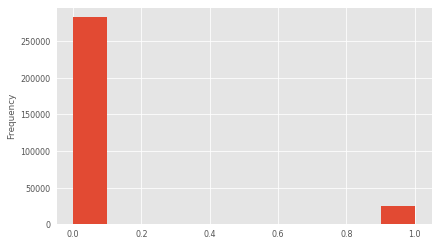

In [10]:
fig, ax = plt.subplots()
application_train_data['TARGET'].astype(int).plot.hist()

In [11]:
app_train_corr = application_train_data.corr()['TARGET'].sort_values()
# Display Correletions
print('Most Positive Correlations:\n', app_train_corr.tail(15))
print('\nMost Negative Correlations:\n', app_train_corr.head(15))

Most Positive Correlations:
 DEF_60_CNT_SOCIAL_CIRCLE       0.031276
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
LIVE_CITY_NOT_WORK_CITY        0.032518
OWN_CAR_AGE                    0.037612
DAYS_REGISTRATION              0.041975
FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, Length: 15, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_EMPLOYED                -0.044932
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE            

#### Get an overview of missing data or NaN values

In [12]:
# Check for missing data in all columns or features
def check_missing_data(dataset):
    '''
    Description: Count NaN values in dataset add them to a total variable and
        calculate the percent of missing data per columns and merge total and
        percent in a single table.
    Receives: 
        dataset - Pandas dataframe
    Returns:
        missing_data - Table with total and missing data percentage per column
    '''
    total = dataset.isnull().sum().sort_values(ascending = False)
    percent = (dataset.isnull().sum()/dataset.isnull().count()*100).sort_values(ascending = False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

In [13]:
app_train_missing_data = check_missing_data(application_train_data)

In [14]:
app_train_missing_data.head(20)

Total    Percent
COMMONAREA_MEDI           214865  69.872297
COMMONAREA_AVG            214865  69.872297
COMMONAREA_MODE           214865  69.872297
NONLIVINGAPARTMENTS_MODE  213514  69.432963
NONLIVINGAPARTMENTS_MEDI  213514  69.432963
NONLIVINGAPARTMENTS_AVG   213514  69.432963
FONDKAPREMONT_MODE        210295  68.386172
LIVINGAPARTMENTS_MEDI     210199  68.354953
LIVINGAPARTMENTS_MODE     210199  68.354953
LIVINGAPARTMENTS_AVG      210199  68.354953
FLOORSMIN_MEDI            208642  67.848630
FLOORSMIN_MODE            208642  67.848630
FLOORSMIN_AVG             208642  67.848630
YEARS_BUILD_MEDI          204488  66.497784
YEARS_BUILD_AVG           204488  66.497784
YEARS_BUILD_MODE          204488  66.497784
OWN_CAR_AGE               202929  65.990810
LANDAREA_MODE             182590  59.376738
LANDAREA_AVG              182590  59.376738
LANDAREA_MEDI             182590  59.376738

[20 rows x 2 columns]

The purpose of above output is to find top features with more than ~60% of missing data and know if is worth to keep this data  based on their features names or descriptions, at the moment is to early to determine that, but we can see at leat 20 features with more than 60% of missing data, what we need to determine now is what type of features are are Numeric or Not-Numeric, this will help us with featres selection and Impute only the features that we really need, then our next step is find borrowers with the most Null or NaN entries.

In [15]:
applicants_with_most_NaNs = application_train_data.isnull().sum(axis=1).sort_values(ascending=False)

In [73]:
# Show a chart of applicants or borrowers with the most missing data to the less to get a picture 
# of how missing data affects the borrower behavior

plt.figure(figsize = (10,6))
plt.hist(applicants_with_most_NaNs)
plt.title('Applicants Missing Features Count')
plt.xlabel('Number of Features Specified as \'NaN\'')
plt.ylabel('Number of Applicants')
plt.savefig('applicants_with_most_NaNs.png')
plt.show()

NameError: name 'applicants_with_most_NaNs' is not defined

<Figure size 720x432 with 0 Axes>

Histogram tells that around 60 features are missing for around 20,000 applicants, which is not bad because we have more than 300,000 applicants, we can continue to use the dataset as it is and consider an Imputing techinique to help with the missing values.

#### Investigate Numerical and Categorical features

On the following section we will locate those features who are numerical and categorical this will help us to know how our data is distributed and identify features that may need One-hot encoding.

Get info about what are the different datatypes in the training dataset
application_train_data.info()

In [17]:
application_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [18]:
def fill_dict_features(df):
    features_dict = {}
    for feature in df.columns:
        features_dict[feature] = len(df[feature].unique()),df[feature].dtype
    return features_dict

In [19]:
def split_datatypes(dictionary, d_type, need_count=True):
    feat_list_type=[]
    print('Features type: {}'.format(d_type))
    for feature in list(dictionary.keys()):
        if dictionary[feature][1] == d_type:
            if need_count == True:
                feat_list_type.append((feature, features_dict[feature][0]))
            else:
                feat_list_type.append(feature)
    return feat_list_type

We found 3 types of data float64, int64 and object which is basically only 2 datatypes numerical and categorical but now we can easily determine the features and store them in a list for any future reference.

Following output shows all the Object type or Categorical features and their respective count of unique values, we can see we have 3 binary features and the rest haves more than 3 categories, this will help us during the one-hot encoding  preprocessing to better analyze the categorical data and prevent the usage of unnecessary dummy features.

In [20]:
features_dict = fill_dict_features(application_train_data)

In [21]:
# Show Object (O) type features and their total count of unique values
feat_list_type = split_datatypes(features_dict, 'O', True)
feat_list_type

Features type: O


[('NAME_CONTRACT_TYPE', 2),
 ('CODE_GENDER', 3),
 ('FLAG_OWN_CAR', 2),
 ('FLAG_OWN_REALTY', 2),
 ('NAME_TYPE_SUITE', 8),
 ('NAME_INCOME_TYPE', 8),
 ('NAME_EDUCATION_TYPE', 5),
 ('NAME_FAMILY_STATUS', 6),
 ('NAME_HOUSING_TYPE', 6),
 ('OCCUPATION_TYPE', 19),
 ('WEEKDAY_APPR_PROCESS_START', 7),
 ('ORGANIZATION_TYPE', 58),
 ('FONDKAPREMONT_MODE', 5),
 ('HOUSETYPE_MODE', 4),
 ('WALLSMATERIAL_MODE', 8),
 ('EMERGENCYSTATE_MODE', 3)]

Following output shows the Numerical features with their total count of unique values, as we can see most of them are binary features with some 7 fetures with more than 3 "categories" or values, we can use during the data impute and one-hot encoding phase and avoid applying any of these strategies to features that dont need it.

In [22]:
# Show int64 type features and their total count of unique values
feat_list_type = split_datatypes(features_dict, 'int64', True)
feat_list_type

Features type: int64


[('SK_ID_CURR', 307511),
 ('TARGET', 2),
 ('CNT_CHILDREN', 15),
 ('DAYS_BIRTH', 17460),
 ('DAYS_EMPLOYED', 12574),
 ('DAYS_ID_PUBLISH', 6168),
 ('FLAG_MOBIL', 2),
 ('FLAG_EMP_PHONE', 2),
 ('FLAG_WORK_PHONE', 2),
 ('FLAG_CONT_MOBILE', 2),
 ('FLAG_PHONE', 2),
 ('FLAG_EMAIL', 2),
 ('REGION_RATING_CLIENT', 3),
 ('REGION_RATING_CLIENT_W_CITY', 3),
 ('HOUR_APPR_PROCESS_START', 24),
 ('REG_REGION_NOT_LIVE_REGION', 2),
 ('REG_REGION_NOT_WORK_REGION', 2),
 ('LIVE_REGION_NOT_WORK_REGION', 2),
 ('REG_CITY_NOT_LIVE_CITY', 2),
 ('REG_CITY_NOT_WORK_CITY', 2),
 ('LIVE_CITY_NOT_WORK_CITY', 2),
 ('FLAG_DOCUMENT_2', 2),
 ('FLAG_DOCUMENT_3', 2),
 ('FLAG_DOCUMENT_4', 2),
 ('FLAG_DOCUMENT_5', 2),
 ('FLAG_DOCUMENT_6', 2),
 ('FLAG_DOCUMENT_7', 2),
 ('FLAG_DOCUMENT_8', 2),
 ('FLAG_DOCUMENT_9', 2),
 ('FLAG_DOCUMENT_10', 2),
 ('FLAG_DOCUMENT_11', 2),
 ('FLAG_DOCUMENT_12', 2),
 ('FLAG_DOCUMENT_13', 2),
 ('FLAG_DOCUMENT_14', 2),
 ('FLAG_DOCUMENT_15', 2),
 ('FLAG_DOCUMENT_16', 2),
 ('FLAG_DOCUMENT_17', 2),
 ('FLAG

Here we have same applyed logic as in are previous step but results show zero binary features and most of them with large number of unique values, telling us that this is probably the non-categorical data that we can use during our predictions also some of the features have already being one-hot encoded.

In [23]:
# Show float64 type features and their total count of unique values
feat_list_type = split_datatypes(features_dict, 'float64', True)
feat_list_type

Features type: float64


[('AMT_INCOME_TOTAL', 2548),
 ('AMT_CREDIT', 5603),
 ('AMT_ANNUITY', 13673),
 ('AMT_GOODS_PRICE', 1003),
 ('REGION_POPULATION_RELATIVE', 81),
 ('DAYS_REGISTRATION', 15688),
 ('OWN_CAR_AGE', 63),
 ('CNT_FAM_MEMBERS', 18),
 ('EXT_SOURCE_1', 114585),
 ('EXT_SOURCE_2', 119832),
 ('EXT_SOURCE_3', 815),
 ('APARTMENTS_AVG', 2340),
 ('BASEMENTAREA_AVG', 3781),
 ('YEARS_BEGINEXPLUATATION_AVG', 286),
 ('YEARS_BUILD_AVG', 150),
 ('COMMONAREA_AVG', 3182),
 ('ELEVATORS_AVG', 258),
 ('ENTRANCES_AVG', 286),
 ('FLOORSMAX_AVG', 404),
 ('FLOORSMIN_AVG', 306),
 ('LANDAREA_AVG', 3528),
 ('LIVINGAPARTMENTS_AVG', 1869),
 ('LIVINGAREA_AVG', 5200),
 ('NONLIVINGAPARTMENTS_AVG', 387),
 ('NONLIVINGAREA_AVG', 3291),
 ('APARTMENTS_MODE', 761),
 ('BASEMENTAREA_MODE', 3842),
 ('YEARS_BEGINEXPLUATATION_MODE', 222),
 ('YEARS_BUILD_MODE', 155),
 ('COMMONAREA_MODE', 3129),
 ('ELEVATORS_MODE', 27),
 ('ENTRANCES_MODE', 31),
 ('FLOORSMAX_MODE', 26),
 ('FLOORSMIN_MODE', 26),
 ('LANDAREA_MODE', 3564),
 ('LIVINGAPARTMENTS_MOD

Based on what we found now we can determine which features will need one-hot encoding and most important which ones of those we will be imputing without abusing the technique and avoid some overfiting.

#### Feature re-engineering
 
 There are two features that will need re-engineering to better represent the data:
 1. CNT_CHILDREN: This feature will be transformed to 0 for no-children and 1 for children
 2. CNT_FAM_MEMBERS: Will transform this feature in to categorical feature first and after that it will be One-hot encoded
 
#### Features normalization

1. DAYS_EMPLOYED: We will carete a new feature named EMPLOYED with values of 1 if feautre haves 0 or less DAYS_EMPLOYED and 0 if haves values of 1 or more.

#### Features definitions

All features definitios where provided by Home Credit under HomeCredit_columns_description.csv file

### 2. Bureau Data Table (bureau.csv)

In [24]:
# Load and display Burueau data table info
bureau_data = pd.read_csv("Data/bureau.csv")

In [25]:
# Show any dataset info.
def dataset_info(dataset_name, dataset):
    '''
    Description: Display info about specific dataset
    Receives: 
        dataset - Pandas dataset
    Returns:
        NOTHING.
    '''
    display(dataset.info())
    display(dataset.describe().transpose())
    display(dataset.head().transpose())
    print ("Total number of Rows and Cols for {}: {}".format(dataset_name, dataset.shape))
    print ("Total number of Rows and Cols for {}: {}".format(dataset_name, dataset.shape))

In [26]:
dataset_info('bureau', bureau_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
SK_ID_CURR                int64
SK_ID_BUREAU              int64
CREDIT_ACTIVE             object
CREDIT_CURRENCY           object
DAYS_CREDIT               int64
CREDIT_DAY_OVERDUE        int64
DAYS_CREDIT_ENDDATE       float64
DAYS_ENDDATE_FACT         float64
AMT_CREDIT_MAX_OVERDUE    float64
CNT_CREDIT_PROLONG        int64
AMT_CREDIT_SUM            float64
AMT_CREDIT_SUM_DEBT       float64
AMT_CREDIT_SUM_LIMIT      float64
AMT_CREDIT_SUM_OVERDUE    float64
CREDIT_TYPE               object
DAYS_CREDIT_UPDATE        int64
AMT_ANNUITY               float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


None

count          mean           std          min  \
SK_ID_CURR              1716428.0  2.782149e+05  1.029386e+05   100001.000   
SK_ID_BUREAU            1716428.0  5.924434e+06  5.322657e+05  5000000.000   
DAYS_CREDIT             1716428.0 -1.142108e+03  7.951649e+02    -2922.000   
CREDIT_DAY_OVERDUE      1716428.0  8.181666e-01  3.654443e+01        0.000   
DAYS_CREDIT_ENDDATE     1610875.0  5.105174e+02  4.994220e+03   -42060.000   
DAYS_ENDDATE_FACT       1082775.0 -1.017437e+03  7.140106e+02   -42023.000   
AMT_CREDIT_MAX_OVERDUE   591940.0  3.825418e+03  2.060316e+05        0.000   
CNT_CREDIT_PROLONG      1716428.0  6.410406e-03  9.622391e-02        0.000   
AMT_CREDIT_SUM          1716415.0  3.549946e+05  1.149811e+06        0.000   
AMT_CREDIT_SUM_DEBT     1458759.0  1.370851e+05  6.774011e+05 -4705600.320   
AMT_CREDIT_SUM_LIMIT    1124648.0  6.229515e+03  4.503203e+04  -586406.115   
AMT_CREDIT_SUM_OVERDUE  1716428.0  3.791276e+01  5.937650e+03        0.000   
DAYS_CREDIT_UPDATE      1716428.0 -5.937483e+02  7.207473e+02   -41947.000   
AMT_ANNUITY              489637.0  1.571276e+04  3.258269e+05        0.000   

                               25%        50%         75%           max  
SK_ID_CURR               188866.75   278055.0   367426.00  4.562550e+05  
SK_ID_BUREAU            5463953.75  5926303.5  6385681.25  6.843457e+06  
DAYS_CREDIT               -1666.00     -987.0     -474.00  0.000000e+00  
CREDIT_DAY_OVERDUE            0.00        0.0        0.00  2.792000e+03  
DAYS_CREDIT_ENDDATE       -1138.00     -330.0      474.00  3.119900e+04  
DAYS_ENDDATE_FACT         -1489.00     -897.0     -425.00  0.000000e+00  
AMT_CREDIT_MAX_OVERDUE        0.00        0.0        0.00  1.159872e+08  
CNT_CREDIT_PROLONG            0.00        0.0        0.00  9.000000e+00  
AMT_CREDIT_SUM            51300.00   125518.5   315000.00  5.850000e+08  
AMT_CREDIT_SUM_DEBT           0.00        0.0    40153.50  1.701000e+08  
AMT_CREDIT_SUM_LIMIT          0.00        0.0        0.00  4.705600e+06  
AMT_CREDIT_SUM_OVERDUE        0.00        0.0        0.00  3.756681e+06  
DAYS_CREDIT_UPDATE         -908.00     -395.0      -33.00  3.720000e+02  
AMT_ANNUITY                   0.00        0.0    13500.00  1.184534e+08  

[14 rows x 8 columns]

0            1                2  \
SK_ID_CURR                       215354       215354           215354   
SK_ID_BUREAU                    5714462      5714463          5714464   
CREDIT_ACTIVE                    Closed       Active           Active   
CREDIT_CURRENCY              currency 1   currency 1       currency 1   
DAYS_CREDIT                        -497         -208             -203   
CREDIT_DAY_OVERDUE                    0            0                0   
DAYS_CREDIT_ENDDATE                -153         1075              528   
DAYS_ENDDATE_FACT                  -153          NaN              NaN   
AMT_CREDIT_MAX_OVERDUE              NaN          NaN              NaN   
CNT_CREDIT_PROLONG                    0            0                0   
AMT_CREDIT_SUM                    91323       225000           464324   
AMT_CREDIT_SUM_DEBT                   0       171342              NaN   
AMT_CREDIT_SUM_LIMIT                NaN          NaN              NaN   
AMT_CREDIT_SUM_OVERDUE                0            0                0   
CREDIT_TYPE             Consumer credit  Credit card  Consumer credit   
DAYS_CREDIT_UPDATE                 -131          -20              -16   
AMT_ANNUITY                         NaN          NaN              NaN   

                                  3                4  
SK_ID_CURR                   215354           215354  
SK_ID_BUREAU                5714465          5714466  
CREDIT_ACTIVE                Active           Active  
CREDIT_CURRENCY          currency 1       currency 1  
DAYS_CREDIT                    -203             -629  
CREDIT_DAY_OVERDUE                0                0  
DAYS_CREDIT_ENDDATE             NaN             1197  
DAYS_ENDDATE_FACT               NaN              NaN  
AMT_CREDIT_MAX_OVERDUE          NaN          77674.5  
CNT_CREDIT_PROLONG                0                0  
AMT_CREDIT_SUM                90000          2.7e+06  
AMT_CREDIT_SUM_DEBT             NaN              NaN  
AMT_CREDIT_SUM_LIMIT            NaN              NaN  
AMT_CREDIT_SUM_OVERDUE            0                0  
CREDIT_TYPE             Credit card  Consumer credit  
DAYS_CREDIT_UPDATE              -16              -21  
AMT_ANNUITY                     NaN              NaN  

[17 rows x 5 columns]

Total number of Rows and Cols for bureau: (1716428, 17)
Total number of Rows and Cols for bureau: (1716428, 17)


In [27]:
features_dict = fill_dict_features(bureau_data)

In [28]:
features_dict

{'SK_ID_CURR': (305811, dtype('int64')),
 'SK_ID_BUREAU': (1716428, dtype('int64')),
 'CREDIT_ACTIVE': (4, dtype('O')),
 'CREDIT_CURRENCY': (4, dtype('O')),
 'DAYS_CREDIT': (2923, dtype('int64')),
 'CREDIT_DAY_OVERDUE': (942, dtype('int64')),
 'DAYS_CREDIT_ENDDATE': (14097, dtype('float64')),
 'DAYS_ENDDATE_FACT': (2918, dtype('float64')),
 'AMT_CREDIT_MAX_OVERDUE': (68252, dtype('float64')),
 'CNT_CREDIT_PROLONG': (10, dtype('int64')),
 'AMT_CREDIT_SUM': (236709, dtype('float64')),
 'AMT_CREDIT_SUM_DEBT': (226538, dtype('float64')),
 'AMT_CREDIT_SUM_LIMIT': (51727, dtype('float64')),
 'AMT_CREDIT_SUM_OVERDUE': (1616, dtype('float64')),
 'CREDIT_TYPE': (15, dtype('O')),
 'DAYS_CREDIT_UPDATE': (2982, dtype('int64')),
 'AMT_ANNUITY': (40322, dtype('float64'))}

As we did with application_train dataset we will split the bureau_data by its features data types and determine how the Categorical and Numberical data behaves and which features will need one-hot encoding and which ones not.

In [29]:
feat_list_type = split_datatypes(features_dict, 'O', True)
feat_list_type

Features type: O


[('CREDIT_ACTIVE', 4), ('CREDIT_CURRENCY', 4), ('CREDIT_TYPE', 15)]

In [30]:
feat_list_type = split_datatypes(features_dict, 'int64', True)
feat_list_type

Features type: int64


[('SK_ID_CURR', 305811),
 ('SK_ID_BUREAU', 1716428),
 ('DAYS_CREDIT', 2923),
 ('CREDIT_DAY_OVERDUE', 942),
 ('CNT_CREDIT_PROLONG', 10),
 ('DAYS_CREDIT_UPDATE', 2982)]

In [31]:
feat_list_type = split_datatypes(features_dict, 'float64', True)
feat_list_type

Features type: float64


[('DAYS_CREDIT_ENDDATE', 14097),
 ('DAYS_ENDDATE_FACT', 2918),
 ('AMT_CREDIT_MAX_OVERDUE', 68252),
 ('AMT_CREDIT_SUM', 236709),
 ('AMT_CREDIT_SUM_DEBT', 226538),
 ('AMT_CREDIT_SUM_LIMIT', 51727),
 ('AMT_CREDIT_SUM_OVERDUE', 1616),
 ('AMT_ANNUITY', 40322)]

#### Features definitions
All features definitions where provided by Home Credit under HomeCredit_columns_description.csv file

### 2. Bureau Balance Data Table (bureau_balance.csv)

In [32]:
bureau_balance_data = pd.read_csv("Data/bureau_balance.csv")

In [33]:
dataset_info('bureau_balance', bureau_balance_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
SK_ID_BUREAU      int64
MONTHS_BALANCE    int64
STATUS            object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB


None

count          mean            std        min        25%  \
SK_ID_BUREAU    27299925.0  6.036297e+06  492348.856904  5001709.0  5730933.0   
MONTHS_BALANCE  27299925.0 -3.074169e+01      23.864509      -96.0      -46.0   

                      50%        75%        max  
SK_ID_BUREAU    6070821.0  6431951.0  6842888.0  
MONTHS_BALANCE      -25.0      -11.0        0.0  

[2 rows x 8 columns]

0        1        2        3        4
SK_ID_BUREAU    5715448  5715448  5715448  5715448  5715448
MONTHS_BALANCE        0       -1       -2       -3       -4
STATUS                C        C        C        C        C

[3 rows x 5 columns]

Total number of Rows and Cols for bureau_balance: (27299925, 3)
Total number of Rows and Cols for bureau_balance: (27299925, 3)


In [34]:
features_dict = fill_dict_features(bureau_balance_data)

In [35]:
feat_list_type = split_datatypes(features_dict, 'O', True)
feat_list_type

Features type: O


[('STATUS', 8)]

In [36]:
feat_list_type = split_datatypes(features_dict, 'int64', True)
feat_list_type

Features type: int64


[('SK_ID_BUREAU', 817395), ('MONTHS_BALANCE', 97)]

In [37]:
feat_list_type = split_datatypes(features_dict, 'float64', True)
feat_list_type

Features type: float64


[]

#### Features definitions
All features definitios where provided by Home Credit under bureau_balance.csv file

### Feture Engineering

Of all the tables we found that only application, bureau and bureau_balance have information regarding previous loans and payback history, to engineer a new feature we will focus on the bereau data specificaly the payback performance with lenders other than Home Credit.

Main idea is to identify if an applicant had an issues on paying a loan, features that might help with this task are: DAYS_CREDIT, DAYS_CREDIT_UPDATE, CREDIT_DAY_OVERDUE, AMT_CREDIT_MAX_OVERDUE, AMT_CREDIT_SUM_OVERDUE, we will create new feature from this ones that will tell us if an applicant is overdue on its credit payments, we will name this feature HAS_CREDIT_BUREAU_LOANS_OVERDUE

## II. Exploratory Visualization

### 1. Plot distributions of all numerical tables

In [38]:
# Get all numeric features and add them in to a list 
features_dict = fill_dict_features(application_train_data)
int64_type = split_datatypes(features_dict, 'int64', False)
float64_type = split_datatypes(features_dict, 'float64', False)
application_train_num_feats = int64_type + float64_type
type(application_train_num_feats)

Features type: int64
Features type: float64


list

In [79]:
# Plot all numeric features for a quick view of the data distibution.
vs.plot_feature_distributions(application_train_data[list(application_train_num_feats)], 
                              title="Distributions of Numeric Features of application_train_data", 
                              figsize=(17,70), 
                              num_cols=3)

Charts show the following features with skewed distributions as well with values that fall inside a negative range, because of this we will need to reduce each of this values in a range of 0.0 to 1.0:

'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'DAYS_LAST_PHONE_CHANGE'

We will take a closer look to each one of this features, first expanding the the distribution plot

In [39]:
skewed_features = ['AMT_CREDIT', 
                  'AMT_ANNUITY', 
                  'AMT_GOODS_PRICE', 
                  'DAYS_BIRTH', 
                  'DAYS_EMPLOYED', 
                  'DAYS_REGISTRATION', 
                  'DAYS_ID_PUBLISH', 
                  'OWN_CAR_AGE', 
                  'DAYS_LAST_PHONE_CHANGE']

vs.plot_feature_distributions(application_train_data[skewed_features], 
                              title="Distribution of skewed features", 
                              figsize=(17,70), 
                              num_cols=1)

Distribution shows that 'OWN_CAR_AGE', 'DAYS_REGISTRATION', 'DAYS_EMPLOYED' and 'DAYS_BIRTH' are the ones with the best use for our analysis.

## III. Algorithms and Techniques

Here we will create a Machine learning roadmap of Home Credit data to predict which applicants will fail or fall behind on their loan payments using the TARGET parameter as our target feature, we will try to get this result based on the visualizations and data descriptions.

### Data preprocessing

1. Preprocess the data based on:

    1.1. Categorical features who need One-hot encoding.
    
    1.2. Binary categorical features.
    
    1.3. Non-normalized numerical features with skewed distributions and negative values.
    
    1.4. Non-normalized numerical features with skewed distributions and positive values.
    
    1.5. Numerical features with normal distributions but not scaled.
    
    1.6. Numerical features with normal distributions but already scaled.
    
    1.7. Features that will be re-engineered and transform into different features.
    
2. Separate TARGET feature from application_train dataset.
3. Run a cross-validation of the application_train dataset splitting the data by 20% for the cross-testing.
4. Make CNT_CHILDREN a binary feature and replace values in dataset.
5. Make CNT_FAM_MEMBERS feature a categorical feature called FAMILY_SIZE and drop CNT_FAM_MEMBERS.
6. Create a feature called HAS_CREDIT_BUREAU_LOANS_OVERDUE from CREDIT_DAY_OVERDUE feature in bureau.csv dataset.
7. Make DAYS_EMPLOYED a binary feature and replace values in dataset.
8. Apply absolute math function to DAYS_REGISTRATION AND DAYS_LAST_PHONE_CHANGE to make them positive.
9. Log-transform all non-normalized features with skewed distributions including the ones that we applyed the absolute function.
10. Impute NaN values with feature mean using sklearn Imputer class.
11. Drop SK_ID_CURR feature from train dataframe.
12. One-hot encode all categorical features
13. Replace all NaN values in binary categorical features with 0
14. Scale each of the log-transformed numerical features including the DAYS_BIRTH, DAYS_ID_PUBLISH, HOUR_APPR_PROCESS_START, each feature will be scale in a range of 0 to 1.
15. Run all above pipeline steps to preprocess the test validation set.

### Implementation

1. Create a ROC scorer method
2. Use Logistic Regresion to make predictions on the test validation set and calculate a ROC score.
3. Run a GridSearchCV to discover the best scoring hyperparameters.
4. Make predictions on the test validation set using the Logistic Regresion with the hyperparameters chosen using GridSearchCV and calculate a ROC score.
5. Use a KNeighbor classifier to make predictions and calculate ROC score


### Refinement

1. Reduce dimensionality of numerical features with PCA.
    1.1 Fit PCA on all numerical features, trying different parameters for the n_components, observing how many principle components are needed to explain 90% of the variance.
    1.2 Use PCA to reduce dimensionality based on step 1.1 and create a dataframe with the reduced features.
    1.3 Drop all original numeric features from original dataframe, so it only holds binary categorical features. Append the dataframe containing the reduced numerical features back to this original dataframe.
2. Use SelectKBest with different hyperparameters values to see if the learning algorithm performs better
3. Select the learning algorithm who had the highest ROC score either for All the data or PCA-reduction or SelectKBest.
4. Create a prediction process or pipeline that uses the best performing algorithm on the cross-validated test datatable.
5. Train the selected algorithm on the entire train dataset application_train.csv
6. Preprocess the data in the application_test.csv dataset
7. Make predictions on the test dataset using the best learning algorithm and save the results in a csv file.

## IV. Data Preprocessing

In [194]:
# Some imports are redundant with imports made in the early code blocks 
# of this notebook. Repeated here for convenience, so that code blocks 
# from much higher up don't have to be re-executed when re-initiating 
# this notebook.

# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Import supplementary visualizations code visuals.py
import visuals as vs

# Display matplotlib plots inline in this notebook.
%matplotlib inline
# Configure style of plots
plt.style.use('ggplot')
# Make plots smaller
sns.set_context('paper')  

# Allows the use of display() for dataframes.
from IPython.display import display
# Have all columns appear when dataframes are displayed.
pd.set_option('display.max_columns', None) 
# Have 100 rows appear when a dataframe is displayed
pd.set_option('display.max_rows', 50)
# Display dimensions whenever a dataframe is printed out.
pd.set_option('display.show_dimensions', True)

# Import data preprocessing libraries
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import MinMaxScaler

# Import feature selection/dimensionality reduction libraries
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif, chi2

# Import learning algorithms
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier

# Import ROC area-under-curve score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer

# Import train-test split, ShuffleSplit, GridSearchCV, and K-fold cross validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import PredefinedSplit
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV, ParameterGrid
from sklearn.model_selection import StratifiedKFold

# Import a Logistic Regression classifier
from sklearn.linear_model import LogisticRegression

# In order to create CSV files
import csv

In [195]:
# Load the main data tables
application_train_data = pd.read_csv("Data/application_train.csv")
application_test_data = pd.read_csv("Data/application_test.csv")

# Load the Bureau data table
bureau_data = pd.read_csv("Data/bureau.csv")

#### Step 1: Create lists of different feature types

In [196]:
# Step 1: Create lists of different feature types in the main data 
# frame, based on how each type will need to be preprocessed.

# 1. All 18 categorical features needing one-hot encoding. 
#    Includes the 4 categorical features originally 
#    mis-identified as having been normalized:
#    EMERGENCYSTATE_MODE, HOUSETYPE_MODE, WALLSMATERIAL_MODE, 
#    FONDKAPREMONT_MODE
cat_feat_need_one_hot = [
    'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 
    'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 
    'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_RATING_CLIENT',
    'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE',
    'NAME_TYPE_SUITE', 'OCCUPATION_TYPE', 'EMERGENCYSTATE_MODE',
    'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'FONDKAPREMONT_MODE'
]

# 2. All 32 binary categorical features already one-hot encoded.
bin_cat_feat = [
    'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
    'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
    'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
    'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
    'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4',
    'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7',
    'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10',
    'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13',
    'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16',
    'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19',
    'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21'
]

# 3. All 2 non-normalized numerical features with skewed distributions 
#    and negative values. These features will need to have their 
#    distributions translated to positive ranges before being 
#    log-transformed, and then later scaled to the range [0,1].
non_norm_feat_neg_values_skewed = [
    'DAYS_REGISTRATION', 'DAYS_LAST_PHONE_CHANGE'
]


# 4. All 15 non-normalized numerical features with skewed distributions, 
#    and only positive values. These features will need to be 
#    log-transformed, and eventually scaled to the range [0,1].
non_norm_feat_pos_values_skewed = [
    'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
    'AMT_GOODS_PRICE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
    'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
    'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
    'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'OWN_CAR_AGE'
]

# 5. All 4 numerical features with normal shapes but needing to be scaled 
#    to the range [0,1].
norm_feat_need_scaling = [
    'DAYS_BIRTH', 'DAYS_ID_PUBLISH', 'HOUR_APPR_PROCESS_START',
    'REGION_POPULATION_RELATIVE'
]

# 6. All 46 numerical features that have been normalized to the range 
#   [0,1]. These features will need neither log-transformation, nor 
#   any further scaling.
norm_feat_not_need_scaling = [
    'EXT_SOURCE_2', 'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG',
    'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_AVG', 
    'FLOORSMAX_MODE', 'FLOORSMAX_MEDI', 'LIVINGAREA_AVG',
    'LIVINGAREA_MODE', 'LIVINGAREA_MEDI', 'ENTRANCES_AVG',
    'ENTRANCES_MODE', 'ENTRANCES_MEDI', 'APARTMENTS_AVG',
    'APARTMENTS_MODE', 'APARTMENTS_MEDI', 'ELEVATORS_AVG', 
    'ELEVATORS_MODE', 'ELEVATORS_MEDI', 'NONLIVINGAREA_AVG',
    'NONLIVINGAREA_MODE', 'NONLIVINGAREA_MEDI', 'EXT_SOURCE_1',
    'BASEMENTAREA_AVG', 'BASEMENTAREA_MODE', 'BASEMENTAREA_MEDI',
    'LANDAREA_AVG', 'LANDAREA_MODE', 'LANDAREA_MEDI',
    'YEARS_BUILD_AVG', 'YEARS_BUILD_MODE', 'YEARS_BUILD_MEDI',
    'FLOORSMIN_AVG', 'FLOORSMIN_MODE', 'FLOORSMIN_MEDI',
    'LIVINGAPARTMENTS_AVG', 'LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_MEDI',
    'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_MEDI',
    'COMMONAREA_AVG', 'COMMONAREA_MODE', 'COMMONAREA_MEDI',
    'TOTALAREA_MODE'
]

# 7. The remaining 3 features in the main data frame that will be 
#    re-engineered and transformed into different features
feat_to_be_reengineered = [
    'CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'DAYS_EMPLOYED'
]


In [197]:
# Verify that all 120 features in the main data frame have been categorized 
# according to how they will be preprocessed.
count_of_categorized_features = len(cat_feat_need_one_hot) + \
                                len(bin_cat_feat) + \
                                len(non_norm_feat_neg_values_skewed) + \
                                len(non_norm_feat_pos_values_skewed) + \
                                len(norm_feat_need_scaling) + \
                                len(norm_feat_not_need_scaling) + \
                                len(feat_to_be_reengineered)
print('Number of features in main data frame that have been categorized: {}. Expected: 120.'.format(count_of_categorized_features))

Number of features in main data frame that have been categorized: 120. Expected: 120.


#### Step 2: Separate target data from training dataset.

In [198]:
targets = application_train_data['TARGET']
features_raw = application_train_data.drop('TARGET', axis = 1)

#### Step 3: Run a cross-validation of the application_train dataset splitting the data by 20% for the cross-testing.

In [199]:
X_train_raw, X_test_raw, y_train, y_test = train_test_split(features_raw, 
                                                    targets, 
                                                    test_size = 0.2, 
                                                    random_state = 42)

In [200]:
X_train_raw.columns

Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT',
       'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=121)

#### Step 4: Make CNT_CHILDREN a binary feature and replace values in dataset.

In [201]:
def drop_feature(dataset, feature):
    return dataset.drop(feature, axis=1)

def add_feature_to_list(feature_list, new_feature):
    return feature_list + [new_feature]

In [202]:
def engineer_cnt_children_feature(dataset, feature):
    CNT_CHILDREN_train = dataset[feature]
    HAS_CHILDREN = CNT_CHILDREN_train.map(lambda x: 1 if x > 0 else 0)
    dataset = dataset.assign(HAS_CHILDREN=HAS_CHILDREN.values)
    return dataset

def add_and_remove_cnt_children_feature(dataset, feature, feature_list):
    dataset = engineer_cnt_children_feature(dataset, feature)
    dataset = drop_feature(dataset, feature)
    feature_list = add_feature_to_list(feature_list, 'HAS_CHILDREN')
    return dataset, feature_list

In [203]:
X_train_raw, bin_cat_feat = add_and_remove_cnt_children_feature(X_train_raw, 'CNT_CHILDREN', bin_cat_feat)

#### Step 5: Make CNT_FAM_MEMBERS feature a categorical feature called FAMILY_SIZE and drop CNT_FAM_MEMBERS.

In [204]:
def engineer_cnt_family_members_feature(dataset, feature):
    CNT_FAM_MEMBERS_train = dataset[feature]
    NUMBER_FAMILY_MEMBERS = CNT_FAM_MEMBERS_train.map(lambda x: 'one' if x == 1 else ('two' if x == 2 else 'three_plus'))
    dataset = dataset.assign(NUMBER_FAMILY_MEMBERS=NUMBER_FAMILY_MEMBERS.values)
    return dataset

def add_and_remove_cnt_family_members_feature(dataset, feature, feature_list):
    dataset = engineer_cnt_family_members_feature(dataset, feature)
    dataset = drop_feature(dataset, feature)
    feature_list = add_feature_to_list(feature_list, 'NUMBER_FAMILY_MEMBERS')
    return dataset, feature_list

In [205]:
X_train_raw, cat_feat_need_one_hot = add_and_remove_cnt_family_members_feature(X_train_raw, 'CNT_FAM_MEMBERS', cat_feat_need_one_hot)

In [206]:
# Validate new feature was added to the end of the list.
cat_feat_need_one_hot[-1]

'NUMBER_FAMILY_MEMBERS'

#### Step 6: Create a feature called HAS_CREDIT_BUREAU_LOANS_OVERDUE from CREDIT_DAY_OVERDUE feature in bureau.csv dataset.

In [207]:
# Filter the bureau data table for loans which are overdue (have a value 
# for CREDIT_DAY_OVERDUE that's greater than 0)
def engineer_credit_day_overdue_feature(dataset, feature):
    return dataset[bureau_data[feature]> 0]

In [208]:
bureau_data_filtered_for_overdue = engineer_credit_day_overdue_feature(bureau_data,'CREDIT_DAY_OVERDUE')
bureau_data_filtered_for_overdue.head().transpose()

365              785              936   \
SK_ID_CURR                       282297           408647           380677   
SK_ID_BUREAU                    5714943          5715468          5715645   
CREDIT_ACTIVE                    Active           Active           Active   
CREDIT_CURRENCY              currency 1       currency 1       currency 1   
DAYS_CREDIT                       -2712             -313            -2659   
CREDIT_DAY_OVERDUE                 2603                6               30   
DAYS_CREDIT_ENDDATE               -2498              233            -2353   
DAYS_ENDDATE_FACT                   NaN              NaN              NaN   
AMT_CREDIT_MAX_OVERDUE             4590              NaN              NaN   
CNT_CREDIT_PROLONG                    0                0                0   
AMT_CREDIT_SUM                    24696           417208            57024   
AMT_CREDIT_SUM_DEBT             231.525           214947                0   
AMT_CREDIT_SUM_LIMIT                  0                0              NaN   
AMT_CREDIT_SUM_OVERDUE          231.525              288             58.5   
CREDIT_TYPE             Consumer credit  Consumer credit  Consumer credit   
DAYS_CREDIT_UPDATE                -1077               -5             -493   
AMT_ANNUITY                         NaN              NaN              NaN   

                                   1575             1791  
SK_ID_CURR                       218135           229323  
SK_ID_BUREAU                    5716400          5716671  
CREDIT_ACTIVE                    Active           Active  
CREDIT_CURRENCY              currency 1       currency 1  
DAYS_CREDIT                       -2543             -757  
CREDIT_DAY_OVERDUE                 2156              496  
DAYS_CREDIT_ENDDATE               -2172              NaN  
DAYS_ENDDATE_FACT                   NaN              NaN  
AMT_CREDIT_MAX_OVERDUE              NaN              NaN  
CNT_CREDIT_PROLONG                    0                0  
AMT_CREDIT_SUM                    45000           225000  
AMT_CREDIT_SUM_DEBT                 NaN              NaN  
AMT_CREDIT_SUM_LIMIT                NaN              NaN  
AMT_CREDIT_SUM_OVERDUE              504           169582  
CREDIT_TYPE             Consumer credit  Consumer credit  
DAYS_CREDIT_UPDATE                -2156               -4  
AMT_ANNUITY                         NaN              NaN  

[17 rows x 5 columns]

In [209]:
# Following function helps us to create a new feature to know if an applicant
# is overdue on any of its loans, first we filter the applicant or borrower ID
# and we iterate over the overdue table and see if the borrower is in this list
# if it is we add it to a list indicating a 1 if is overdue, at the end of this
# we assign the new columns to the original dataframe.
def build_feature_HAS_CREDIT_BUREAU_LOANS_OVERDUE(dataframe):
    HAS_CREDIT_BUREAU_LOANS_OVERDUE = pd.Series(data=0, index = dataframe['SK_ID_CURR'].index)
    main_data_table_borrower_IDs = dataframe['SK_ID_CURR'].values

    for index, row in bureau_data_filtered_for_overdue.iterrows():
        borrower_ID = row['SK_ID_CURR']
        if borrower_ID in main_data_table_borrower_IDs:
            borrower_index_main_data_table = dataframe.index[dataframe['SK_ID_CURR'] == borrower_ID].tolist()[0]
            HAS_CREDIT_BUREAU_LOANS_OVERDUE.loc[borrower_index_main_data_table] = 1
    dataframe = dataframe.assign(HAS_CREDIT_BUREAU_LOANS_OVERDUE=HAS_CREDIT_BUREAU_LOANS_OVERDUE.values)
    return dataframe

In [210]:
X_train_raw = build_feature_HAS_CREDIT_BUREAU_LOANS_OVERDUE(X_train_raw)

In [211]:
X_train_raw.head().transpose()

123473  \
SK_ID_CURR                                              243191   
NAME_CONTRACT_TYPE                                  Cash loans   
CODE_GENDER                                                  F   
FLAG_OWN_CAR                                                 Y   
FLAG_OWN_REALTY                                              N   
AMT_INCOME_TOTAL                                        171000   
AMT_CREDIT                                              555273   
AMT_ANNUITY                                            16366.5   
AMT_GOODS_PRICE                                         463500   
NAME_TYPE_SUITE                                  Unaccompanied   
NAME_INCOME_TYPE                                     Pensioner   
NAME_EDUCATION_TYPE              Secondary / secondary special   
NAME_FAMILY_STATUS                                       Widow   
NAME_HOUSING_TYPE                            House / apartment   
REGION_POPULATION_RELATIVE                            0.035792   
DAYS_BIRTH                                              -23349   
DAYS_EMPLOYED                                           365243   
DAYS_REGISTRATION                                        -3595   
DAYS_ID_PUBLISH                                          -4408   
OWN_CAR_AGE                                                 31   
FLAG_MOBIL                                                   1   
FLAG_EMP_PHONE                                               0   
FLAG_WORK_PHONE                                              0   
FLAG_CONT_MOBILE                                             1   
FLAG_PHONE                                                   0   
...                                                        ...   
FLAG_DOCUMENT_6                                              0   
FLAG_DOCUMENT_7                                              0   
FLAG_DOCUMENT_8                                              0   
FLAG_DOCUMENT_9                                              0   
FLAG_DOCUMENT_10                                             0   
FLAG_DOCUMENT_11                                             0   
FLAG_DOCUMENT_12                                             0   
FLAG_DOCUMENT_13                                             0   
FLAG_DOCUMENT_14                                             0   
FLAG_DOCUMENT_15                                             0   
FLAG_DOCUMENT_16                                             0   
FLAG_DOCUMENT_17                                             0   
FLAG_DOCUMENT_18                                             0   
FLAG_DOCUMENT_19                                             0   
FLAG_DOCUMENT_20                                             0   
FLAG_DOCUMENT_21                                             0   
AMT_REQ_CREDIT_BUREAU_HOUR                                   0   
AMT_REQ_CREDIT_BUREAU_DAY                                    0   
AMT_REQ_CREDIT_BUREAU_WEEK                                   0   
AMT_REQ_CREDIT_BUREAU_MON                                    0   
AMT_REQ_CREDIT_BUREAU_QRT                                    1   
AMT_REQ_CREDIT_BUREAU_YEAR                                   1   
HAS_CHILDREN                                                 0   
NUMBER_FAMILY_MEMBERS                                      one   
HAS_CREDIT_BUREAU_LOANS_OVERDUE                              0   

                                                        10118   \
SK_ID_CURR                                              111778   
NAME_CONTRACT_TYPE                                  Cash loans   
CODE_GENDER                                                  M   
FLAG_OWN_CAR                                                 N   
FLAG_OWN_REALTY                                              Y   
AMT_INCOME_TOTAL                                        157500   
AMT_CREDIT                                              198086   
AMT_ANNUITY                                            23638.5   
AMT_GOODS_PRICE              

In [212]:
# Add HAS_CREDIT_BUREAU_LOANS_OVERDUE feature to categorical binary features.
bin_cat_feat = add_feature_to_list(bin_cat_feat, 'HAS_CREDIT_BUREAU_LOANS_OVERDUE')

In [213]:
X_train_raw.head().transpose().tail()

123473      10118  64716       234940 236051
AMT_REQ_CREDIT_BUREAU_QRT            1           0      0           1      0
AMT_REQ_CREDIT_BUREAU_YEAR           1           1      5           3      4
HAS_CHILDREN                         0           1      0           1      0
NUMBER_FAMILY_MEMBERS              one  three_plus    two  three_plus    two
HAS_CREDIT_BUREAU_LOANS_OVERDUE      0           0      0           0      0

[5 rows x 5 columns]

#### Step 7: Make DAYS_EMPLOYED a binary feature and replace values in dataset.

In [214]:
def engineer_days_employed_feature(dataset, feature):
    DAYS_EMPLOYED_train = dataset[feature]
    HAS_JOB = DAYS_EMPLOYED_train.map(lambda x: 1 if x <= 0 else 0)
    dataset = dataset.assign(HAS_JOB=HAS_JOB.values)
    return dataset

def add_and_remove_days_employed_feature(dataset, feature, feature_list):
    dataset = engineer_days_employed_feature(dataset, feature)
    dataset = drop_feature(dataset, feature)
    feature_list = add_feature_to_list(feature_list, 'HAS_JOB')
    return dataset, feature_list

In [215]:
X_train_raw, bin_cat_feat = add_and_remove_days_employed_feature(X_train_raw, 'DAYS_EMPLOYED', bin_cat_feat)
len(bin_cat_feat)

35

#### Step 8: Apply absolute math function to DAYS_REGISTRATION AND DAYS_LAST_PHONE_CHANGE to make them positive.

In [216]:
def apply_abs_to_features_list(dataset, features_list):
    for feature in features_list:
        dataset[feature] = abs(dataset[feature])
    return dataset

In [217]:
X_train_raw = apply_abs_to_features_list(X_train_raw, non_norm_feat_neg_values_skewed)
X_train_raw[non_norm_feat_neg_values_skewed].head()

DAYS_REGISTRATION  DAYS_LAST_PHONE_CHANGE
123473             3595.0                  2058.0
10118              4281.0                    73.0
64716              5680.0                  1959.0
234940             2618.0                   531.0
236051             8006.0                     9.0

[5 rows x 2 columns]

#### Step 9: Log-transform all non-normalized features with skewed distributions including the ones that we applyed the absolute function.

In [218]:
log_transform_feats = non_norm_feat_pos_values_skewed + non_norm_feat_neg_values_skewed

In [219]:
def np_log_transform(x):
    return np.log(x + 1)

def apply_log_transform(dataset):
    dataset[log_transform_feats] = dataset[log_transform_feats].apply(np_log_transform)
    return dataset

In [220]:
X_train_raw = apply_log_transform(X_train_raw)
X_train_raw[log_transform_feats].head().transpose()

123473     10118      64716      234940  \
AMT_INCOME_TOTAL            12.049425  11.967187  11.813037  12.008438   
AMT_CREDIT                  13.227217  12.196459  13.562301  13.710151   
AMT_ANNUITY                  9.703053  10.070674  10.133567  10.512941   
AMT_GOODS_PRICE             13.046564  12.049425  13.381648  13.710151   
OBS_30_CNT_SOCIAL_CIRCLE     0.000000   0.693147   1.098612   0.000000   
DEF_30_CNT_SOCIAL_CIRCLE     0.000000   0.000000   0.000000   0.000000   
OBS_60_CNT_SOCIAL_CIRCLE     0.000000   0.693147   1.098612   0.000000   
DEF_60_CNT_SOCIAL_CIRCLE     0.000000   0.000000   0.000000   0.000000   
AMT_REQ_CREDIT_BUREAU_HOUR   0.000000   0.000000   0.000000   0.000000   
AMT_REQ_CREDIT_BUREAU_DAY    0.000000   0.000000   0.000000   0.000000   
AMT_REQ_CREDIT_BUREAU_WEEK   0.000000   0.000000   0.000000   0.000000   
AMT_REQ_CREDIT_BUREAU_MON    0.000000   0.000000   0.000000   0.000000   
AMT_REQ_CREDIT_BUREAU_QRT    0.693147   0.000000   0.000000   0.693147   
AMT_REQ_CREDIT_BUREAU_YEAR   0.693147   0.693147   1.791759   1.386294   
OWN_CAR_AGE                  3.465736        NaN   2.197225   2.772589   
DAYS_REGISTRATION            8.187577   8.362175   8.644883   7.870548   
DAYS_LAST_PHONE_CHANGE       7.629976   4.304065   7.580700   6.276643   

                               236051  
AMT_INCOME_TOTAL            12.323860  
AMT_CREDIT                  13.187532  
AMT_ANNUITY                  9.966228  
AMT_GOODS_PRICE             13.075274  
OBS_30_CNT_SOCIAL_CIRCLE     1.945910  
DEF_30_CNT_SOCIAL_CIRCLE     0.693147  
OBS_60_CNT_SOCIAL_CIRCLE     1.945910  
DEF_60_CNT_SOCIAL_CIRCLE     0.000000  
AMT_REQ_CREDIT_BUREAU_HOUR   0.000000  
AMT_REQ_CREDIT_BUREAU_DAY    0.000000  
AMT_REQ_CREDIT_BUREAU_WEEK   0.000000  
AMT_REQ_CREDIT_BUREAU_MON    0.000000  
AMT_REQ_CREDIT_BUREAU_QRT    0.000000  
AMT_REQ_CREDIT_BUREAU_YEAR   1.609438  
OWN_CAR_AGE                       NaN  
DAYS_REGISTRATION            8.988071  
DAYS_LAST_PHONE_CHANGE       2.302585  

[17 rows x 5 columns]

#### Step 10: Impute NaN values with feature mean using sklearn Imputer class.

In [221]:
# Create a list of all the 67 numerical features in the main dataframe. These include all 
# 17 features that were log-transformed in Step 12, as well as the 4 normal features that 
# still need to be scaled, as well as the 46 normal features that don't need scaling.
numerical_features = log_transform_feats + norm_feat_need_scaling + norm_feat_not_need_scaling
imputer = Imputer()

In [222]:
# Create a list of all numerical features in the training set that have at least one 'NaN' entry
def get_features_with_one_na(dataset):
     return dataset[numerical_features].columns[dataset[numerical_features].isna().any()].tolist()

def impute_nans(dataset, numerical_features_with_nan):
    return imputer.fit_transform(dataset[numerical_features_with_nan])

In [223]:
numerical_features_with_nan = get_features_with_one_na(X_train_raw)
X_train_raw[numerical_features_with_nan] = impute_nans(X_train_raw, numerical_features_with_nan)
X_train_raw[numerical_features_with_nan].head().transpose()

123473     10118      64716      234940  \
AMT_ANNUITY                    9.703053  10.070674  10.133567  10.512941   
AMT_GOODS_PRICE               13.046564  12.049425  13.381648  13.710151   
OBS_30_CNT_SOCIAL_CIRCLE       0.000000   0.693147   1.098612   0.000000   
DEF_30_CNT_SOCIAL_CIRCLE       0.000000   0.000000   0.000000   0.000000   
OBS_60_CNT_SOCIAL_CIRCLE       0.000000   0.693147   1.098612   0.000000   
DEF_60_CNT_SOCIAL_CIRCLE       0.000000   0.000000   0.000000   0.000000   
AMT_REQ_CREDIT_BUREAU_HOUR     0.000000   0.000000   0.000000   0.000000   
AMT_REQ_CREDIT_BUREAU_DAY      0.000000   0.000000   0.000000   0.000000   
AMT_REQ_CREDIT_BUREAU_WEEK     0.000000   0.000000   0.000000   0.000000   
AMT_REQ_CREDIT_BUREAU_MON      0.000000   0.000000   0.000000   0.000000   
AMT_REQ_CREDIT_BUREAU_QRT      0.693147   0.000000   0.000000   0.693147   
AMT_REQ_CREDIT_BUREAU_YEAR     0.693147   0.693147   1.791759   1.386294   
OWN_CAR_AGE                    3.465736   2.245587   2.197225   2.772589   
DAYS_LAST_PHONE_CHANGE         7.629976   4.304065   7.580700   6.276643   
EXT_SOURCE_2                   0.358568   0.490305   0.643404   0.426431   
EXT_SOURCE_3                   0.563835   0.595456   0.706205   0.506484   
YEARS_BEGINEXPLUATATION_AVG    0.977713   0.974200   0.977713   0.984100   
YEARS_BEGINEXPLUATATION_MODE   0.977049   0.974200   0.977049   0.984100   
YEARS_BEGINEXPLUATATION_MEDI   0.977718   0.974200   0.977718   0.984100   
FLOORSMAX_AVG                  0.226512   0.166700   0.226512   0.333300   
FLOORSMAX_MODE                 0.222510   0.166700   0.222510   0.333300   
FLOORSMAX_MEDI                 0.226118   0.166700   0.226118   0.333300   
LIVINGAREA_AVG                 0.107483   0.059400   0.107483   0.091700   
LIVINGAREA_MODE                0.105985   0.061900   0.105985   0.095500   
LIVINGAREA_MEDI                0.108670   0.060500   0.108670   0.093300   
...                                 ...        ...        ...        ...   
NONLIVINGAREA_MODE             0.026954   0.015800   0.026954   0.250700   
NONLIVINGAREA_MEDI             0.028175   0.015300   0.028175   0.241800   
EXT_SOURCE_1                   0.524685   0.244926   0.502462   0.288642   
BASEMENTAREA_AVG               0.088463   0.063300   0.088463   0.113600   
BASEMENTAREA_MODE              0.087532   0.065700   0.087532   0.117900   
BASEMENTAREA_MEDI              0.087959   0.063300   0.087959   0.113600   
LANDAREA_AVG                   0.066439   0.040900   0.066439   0.037400   
LANDAREA_MODE                  0.065007   0.041800   0.065007   0.038200   
LANDAREA_MEDI                  0.067266   0.041600   0.067266   0.038000   
YEARS_BUILD_AVG                0.752876   0.646400   0.752876   0.782400   
YEARS_BUILD_MODE               0.760014   0.660200   0.760014   0.790900   
YEARS_BUILD_MEDI               0.756125   0.651100   0.756125   0.785300   
FLOORSMIN_AVG                  0.232112   0.208300   0.232112   0.041700   
FLOORSMIN_MODE                 0.228227   0.208300   0.228227   0.041700   
FLOORSMIN_MEDI                 0.231809   0.208300   0.231809   0.041700   
LIVINGAPARTMENTS_AVG           0.100839   0.063000   0.100839   0.121000   
LIVINGAPARTMENTS_MODE          0.105644   0.068900   0.105644   0.132200   
LIVINGAPARTMENTS_MEDI          0.101974   0.064100   0.101974   0.123100   
NONLIVINGAPARTMENTS_AVG        0.008882   0.003900   0.008882   0.003900   
NONLIVINGAPARTMENTS_MODE       0.008141   0.003900   0.008141   0.003900   
NONLIVINGAPARTMENTS_MEDI       0.008709   0.003900   0.008709   0.003900   
COMMONAREA_AVG                 0.044533   0.026600   0.044533   0.094200   
COMMONAREA_MODE                0.042453   0.026900   0.042453   0.095100   
COMMONAREA_MEDI                0.044492   0.026800   0.044492   0.094800   
TOTALAREA_MODE                 0.102577   0.064500   0.102577   0.122200   

                                 236051  
AMT_ANNUITY                    9.96622

#### Step 11: Drop SK_ID_CURR feature from train dataframe.

In [224]:
X_train_raw = drop_feature(X_train_raw, 'SK_ID_CURR')

In [225]:
print('The main training dataframe now has {} columns. Expected: 121.'.format(X_train_raw.shape[1]))

The main training dataframe now has 121 columns. Expected: 121.


#### Step 12: One-hot encode all categorical features

In [226]:
def one_hot_encode(dataset, columns):
    return pd.get_dummies(dataset, columns=columns)

In [227]:
# Check dataset number of columns after one-hot encoding
X_train_raw = one_hot_encode(X_train_raw, cat_feat_need_one_hot)
X_train_raw.shape

(246008, 251)

In [228]:
# Create a list that includes only the newly one-hot encoded features 
# as well as all the categorical features that were already binary.
def create_list_new_one_hot_encode(dataset):
    all_bin_cat_feat = dataset.columns.tolist()
    for column_name in dataset[numerical_features].columns.tolist():
        all_bin_cat_feat.remove(column_name)
    return all_bin_cat_feat

In [229]:
# Check how many features remained in the list
all_bin_cat_feat = create_list_new_one_hot_encode(X_train_raw)
len(all_bin_cat_feat)

184

In [230]:
print('After one-hot encoding, there are now {} columns in the main training dataframe. Expected: 251.'.format(X_train_raw.shape[1]))

After one-hot encoding, there are now 251 columns in the main training dataframe. Expected: 251.


#### Step 13: Replace all NaN values in binary categorical features with 0

In [231]:
# Get a list of all binary categorical features
def get_list_bin_cat_feat(dataset):
    return dataset[all_bin_cat_feat].isna().any()

def create_list_bin_cat_feat_one_nan(dataset):
    return dataset[all_bin_cat_feat].columns[X_train_raw_bin_cat_na].tolist()

def replace_nans_with_zero(dataset):
    return dataset[bin_cat_feat_with_nan].fillna(value=0)

In [232]:
X_train_raw_bin_cat_na = get_list_bin_cat_feat(X_train_raw)
bin_cat_feat_with_nan = create_list_bin_cat_feat_one_nan(X_train_raw)
X_train_raw[bin_cat_feat_with_nan] = replace_nans_with_zero(X_train_raw)

# Validate if there is any NaN value left in the dataset
X_train_raw_bin_cat_na[X_train_raw_bin_cat_na==True]

Series([], Length: 0, dtype: bool)

In [233]:
len(all_bin_cat_feat)

184

#### Step 14: Scale each of the log-transformed numerical features including the DAYS_BIRTH, DAYS_ID_PUBLISH, HOUR_APPR_PROCESS_START, each feature will be scale in a range of 0 to 1.

In [234]:
# Build a list of all features needing scaling.
feats_to_scale = norm_feat_need_scaling + log_transform_feats

# Initialize a scaler with the default range of [0,1]
scaler = MinMaxScaler()

In [235]:
# Fit the scaler to each of the features of the train set that need to be scaled, 
# then transform each of these features' values to the new scale.
def feature_scaler(dataset):
    return scaler.fit_transform(dataset[feats_to_scale])

In [236]:
X_train_raw[feats_to_scale] = feature_scaler(X_train_raw)

# Rename the dataframe to indicate that its columns have been fully preprocessed.
X_train_final = X_train_raw
type(X_train_final)

pandas.core.frame.DataFrame

In [237]:
X_train_raw.head().transpose()

123473    10118     64716   \
AMT_INCOME_TOTAL                          0.302765  0.289641  0.265039   
AMT_CREDIT                                0.558421  0.329353  0.632888   
AMT_ANNUITY                               0.456362  0.528831  0.541229   
AMT_GOODS_PRICE                           0.529295  0.312768  0.602058   
REGION_POPULATION_RELATIVE                0.491595  0.134897  0.491595   
DAYS_BIRTH                                0.105975  0.806539  0.113641   
DAYS_REGISTRATION                         0.813776  0.831130  0.859228   
DAYS_ID_PUBLISH                           0.387523  0.527720  0.304016   
OWN_CAR_AGE                               0.766452  0.496615  0.485919   
FLAG_MOBIL                                1.000000  1.000000  1.000000   
FLAG_EMP_PHONE                            0.000000  1.000000  1.000000   
FLAG_WORK_PHONE                           0.000000  1.000000  0.000000   
FLAG_CONT_MOBILE                          1.000000  1.000000  1.000000   
FLAG_PHONE                                0.000000  1.000000  0.000000   
FLAG_EMAIL                                0.000000  0.000000  0.000000   
HOUR_APPR_PROCESS_START                   0.391304  0.304348  0.565217   
REG_REGION_NOT_LIVE_REGION                0.000000  0.000000  0.000000   
REG_REGION_NOT_WORK_REGION                0.000000  0.000000  0.000000   
LIVE_REGION_NOT_WORK_REGION               0.000000  0.000000  0.000000   
REG_CITY_NOT_LIVE_CITY                    0.000000  0.000000  0.000000   
REG_CITY_NOT_WORK_CITY                    0.000000  0.000000  0.000000   
LIVE_CITY_NOT_WORK_CITY                   0.000000  0.000000  0.000000   
EXT_SOURCE_1                              0.524685  0.244926  0.502462   
EXT_SOURCE_2                              0.358568  0.490305  0.643404   
EXT_SOURCE_3                              0.563835  0.595456  0.706205   
...                                            ...       ...       ...   
OCCUPATION_TYPE_Private service staff     0.000000  0.000000  0.000000   
OCCUPATION_TYPE_Realty agents             0.000000  0.000000  0.000000   
OCCUPATION_TYPE_Sales staff               0.000000  0.000000  0.000000   
OCCUPATION_TYPE_Secretaries               0.000000  0.000000  0.000000   
OCCUPATION_TYPE_Security staff            0.000000  0.000000  0.000000   
OCCUPATION_TYPE_Waiters/barmen staff      0.000000  0.000000  0.000000   
EMERGENCYSTATE_MODE_No                    0.000000  1.000000  0.000000   
EMERGENCYSTATE_MODE_Yes                   0.000000  0.000000  0.000000   
HOUSETYPE_MODE_block of flats             0.000000  1.000000  0.000000   
HOUSETYPE_MODE_specific housing           0.000000  0.000000  0.000000   
HOUSETYPE_MODE_terraced house             0.000000  0.000000  0.000000   
WALLSMATERIAL_MODE_Block                  0.000000  0.000000  0.000000   
WALLSMATERIAL_MODE_Mixed                  0.000000  0.000000  0.000000   
WALLSMATERIAL_MODE_Monolithic             0.000000  0.000000  0.000000   
WALLSMATERIAL_MODE_Others                 0.000000  0.000000  0.000000   
WALLSMATERIAL_MODE_Panel                  0.000000  0.000000  0.000000   
WALLSMATERIAL_MODE_Stone, brick           0.000000  1.000000  0.000000   
WALLSMATERIAL_MODE_Wooden                 0.000000  0.000000  0.000000   
FONDKAPREMONT_MODE_not specified          0.000000  0.000000  0.000000   
FONDKAPREMONT_MODE_org spec account       0.000000  0.000000  0.000000   
FONDKAPREMONT_MODE_reg oper account       0.000000  1.000000  0.000000   
FONDKAPREMONT_MODE_reg oper spec account  0.000000  0.000000  0.000000   
NUMBER_FAMILY_MEMBERS_one                 1.000000  0.000000  0.000000   
NUMBER_FAMILY_MEMBERS_three_plus          0.000000  1.000000  0.000000   
NUMBER_FAMILY_MEMBERS_two                 0.000000  0.000000  1.000000   

                                            234940    236051  
AMT_INCOME_TOTAL                          0.296224  0.346564  
AMT_CREDIT                                0.665745  0.549602  
AMT_AN

In [238]:
print('Training set preprocessing complete. The final training dataframe now has {} columns. Expected: 251.'.format(X_train_final.shape[1]))

Training set preprocessing complete. The final training dataframe now has 251 columns. Expected: 251.


The following pipeline uses all the functions created and used during the training phase, providing a good guideline of how the model works.

In [239]:
# Testing pipeline.
def test_set_preprocessing_pipeline(testing_dataframe, bin_cat_feat, cat_feat_need_one_hot):
    testing_dataframe, bin_cat_feat = add_and_remove_cnt_children_feature(testing_dataframe, 'CNT_CHILDREN', bin_cat_feat)
    testing_dataframe, cat_feat_need_one_hot = add_and_remove_cnt_family_members_feature(testing_dataframe, 'CNT_FAM_MEMBERS', cat_feat_need_one_hot[:-1])
    testing_dataframe = build_feature_HAS_CREDIT_BUREAU_LOANS_OVERDUE(testing_dataframe)
    testing_dataframe, bin_cat_feat = add_and_remove_days_employed_feature(testing_dataframe, 'DAYS_EMPLOYED', bin_cat_feat)
    testing_dataframe = apply_abs_to_features_list(testing_dataframe, non_norm_feat_neg_values_skewed)
    testing_dataframe = apply_log_transform(testing_dataframe)
    numerical_features_with_nan_testing = get_features_with_one_na(testing_dataframe)
    testing_dataframe[numerical_features_with_nan_testing] = impute_nans(testing_dataframe, numerical_features_with_nan_testing)
    testing_dataframe = drop_feature(testing_dataframe, 'SK_ID_CURR')
    testing_dataframe = one_hot_encode(testing_dataframe, cat_feat_need_one_hot)
    X_train_raw_bin_cat_na = get_list_bin_cat_feat(testing_dataframe)
    testing_cols = testing_dataframe.columns
    bin_cat_feat_with_nan_testing = create_list_bin_cat_feat_one_nan(testing_dataframe)
    bin_cat_feat_with_nan_testing = testing_dataframe[all_bin_cat_feat].columns[testing_dataframe[all_bin_cat_feat].isna().any()].tolist()
    testing_dataframe[bin_cat_feat_with_nan_testing] = replace_nans_with_zero(testing_dataframe)
    testing_dataframe[feats_to_scale] = feature_scaler(testing_dataframe)
    return testing_dataframe

In [240]:
X_test_final = test_set_preprocessing_pipeline(X_test_raw, bin_cat_feat, cat_feat_need_one_hot)

In [185]:
print('Test validation set preprocessing complete. The final test validation dataframe now has {} columns. Expected: 251.'.format(X_test_final.shape[1]))

Test validation set preprocessing complete. The final test validation dataframe now has 251 columns. Expected: 251.


## V. Implementation

In [49]:
# Lists of of probability predictions and classifier names. 
# To be used to plot ROC curves of each classifier's prediction 
# probabilities.

y_score_list = []
clf_label_list = []

#### Step 1: Create an ROC area-under-curve scorer.

In [50]:
def roc_auc_scorer(y_targets, y_score):
    # Calculate the performance score between 'y_true' and 'y_predict'
    score = roc_auc_score(y_targets, y_score)
    return score

#### Step 2: Use Logistic Regresion to make predictions on the test validation set and calculate a ROC score.

In [51]:
clf_logistic_reg = LogisticRegression()
clf_logistic_reg.fit(X_train_final, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [52]:
logistic_reg_score = clf_logistic_reg.predict_proba(X_test_final)[:,1]
logistic_reg_roc_auc_score = roc_auc_scorer(y_test, logistic_reg_score)

In [53]:
# Add the Logistic Regression scores to the results list.
y_score_list.append(logistic_reg_score)
clf_label_list.append('Logistic Regression All Features')
print('Logistic Regression (All Features) test validation set predictions\' ROC AUC score: {}'.format(logistic_reg_roc_auc_score))

Logistic Regression (All Features) test validation set predictions' ROC AUC score: 0.7440142914602019


#### Step 3: Run a GridSearchCV to discover the best scoring hyperparameters.
#### Testing with roc_auc_scorer

In [54]:
# Grid search logistic regresion hyperparameters
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge

scoring_fnc = make_scorer(roc_auc_scorer)

clf_logistic_reg_cv=GridSearchCV(clf_logistic_reg, grid,cv=10, scoring=scoring_fnc)
clf_logistic_reg_cv.fit(X_train_final, y_train)
  
print("tuned hpyerparameters :(best parameters) ",clf_logistic_reg_cv.best_params_)
print("accuracy :", clf_logistic_reg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 10.0, 'penalty': 'l1'}
accuracy : 0.5047105342021503


##### Testing without roc_auc_scorer

In [135]:
clf_logistic_reg_cv=GridSearchCV(clf_logistic_reg, grid,cv=10)
clf_logistic_reg_cv.fit(X_train_final, y_train)

print("tuned hpyerparameters :(best parameters) ",clf_logistic_reg_cv.best_params_)
print("accuracy :", clf_logistic_reg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.001, 'penalty': 'l1'}
accuracy : 0.919205879483594


Found that using the logistic regression default scaler gives a 91.92% accuracy vs the roc_auc_scorer 50.62% accuracy.

#### Step 4: Use a KNeighbor classifier to make predictions and calculate ROC score

In [136]:
from sklearn.neighbors import KNeighborsClassifier
clf_kneigh = KNeighborsClassifier(n_neighbors=3)
clf_kneigh.fit(X_train_final, y_train)
kn_reg_score = clf_kneigh.predict_proba(X_test_final)[:,1]
kn_reg_roc_auc_score = roc_auc_scorer(y_test, kn_reg_score)

# Add the Known Neighbors scores to the results list.
y_score_list.append(kn_reg_score)
clf_label_list.append('KNeighbors Regression All Features')
print('KNeighbors (All Features) test validation set predictions\' ROC AUC score: {}'.format(kn_reg_roc_auc_score))

KNeighbors (All Features) test validation set predictions' ROC AUC score: 0.53969821492803


## VI. Refinement

In [30]:
# Modules Import
# Some imports are redundant with imports made in the early code blocks 
# of this notebook. Repeated here for convenience, so that code blocks 
# from much higher up don't have to be re-executed when re-initiating 
# this notebook.

# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# Import supplementary visualizations code visuals.py
import visuals as vs

# Display matplotlib plots inline in this notebook.
%matplotlib inline
# Configure style of plots
plt.style.use('ggplot')
# Make plots smaller
sns.set_context('paper')  

# Allows the use of display() for dataframes.
from IPython.display import display
# Have all columns appear when dataframes are displayed.
pd.set_option('display.max_columns', None) 
# Have 100 rows appear when a dataframe is displayed
pd.set_option('display.max_rows', 50)
# Display dimensions whenever a dataframe is printed out.
pd.set_option('display.show_dimensions', True)

# Import data preprocessing libraries
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import MinMaxScaler

# Import feature selection/dimensionality reduction libraries
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif, chi2

# Import learning algorithms
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier

# Import ROC area-under-curve score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer

# Import train-test split, ShuffleSplit, GridSearchCV, and K-fold cross validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import PredefinedSplit
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV, ParameterGrid
from sklearn.model_selection import StratifiedKFold

# Import a Logistic Regression classifier
from sklearn.linear_model import LogisticRegression

# In order to create CSV files
import csv

In [34]:
# Load main datasets
application_train_data = pd.read_csv("Data/application_train.csv")
application_test_data = pd.read_csv("Data/application_test.csv")

# Load the Bureau data table
bureau_data = pd.read_csv("data/bureau.csv")

In [35]:
# 1: Create lists of different feature types in the main data 
# frame, based on how each type will need to be preprocessed.

# i. All 18 categorical features needing one-hot encoding. 
#    Includes the 4 categorical features originally 
#    mis-identified as having been normalized:
#    EMERGENCYSTATE_MODE, HOUSETYPE_MODE, WALLSMATERIAL_MODE, 
#    FONDKAPREMONT_MODE
cat_feat_need_one_hot = [
    'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 
    'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 
    'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_RATING_CLIENT',
    'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE',
    'NAME_TYPE_SUITE', 'OCCUPATION_TYPE', 'EMERGENCYSTATE_MODE',
    'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'FONDKAPREMONT_MODE'
]

# ii. All 32 binary categorical features already one-hot encoded.
bin_cat_feat = [
    'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
    'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
    'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
    'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
    'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4',
    'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7',
    'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10',
    'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13',
    'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16',
    'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19',
    'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21'
]

# iii. All 2 non-normalized numerical features with skewed distributions 
#    and negative values. These features will need to have their 
#    distributions translated to positive ranges before being 
#    log-transformed, and then later scaled to the range [0,1].
non_norm_feat_neg_values_skewed = [
    'DAYS_REGISTRATION', 'DAYS_LAST_PHONE_CHANGE'
]


# iv. All 15 non-normalized numerical features with skewed distributions, 
#    and only positive values. These features will need to be 
#    log-transformed, and eventually scaled to the range [0,1].
non_norm_feat_pos_values_skewed = [
    'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
    'AMT_GOODS_PRICE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
    'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
    'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
    'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'OWN_CAR_AGE'
]

# v. All 4 numerical features with normal shapes but needing to be scaled 
#    to the range [0,1].
norm_feat_need_scaling = [
    'DAYS_BIRTH', 'DAYS_ID_PUBLISH', 'HOUR_APPR_PROCESS_START',
    'REGION_POPULATION_RELATIVE'
]

# vi. All 46 numerical features that have been normalized to the range 
#   [0,1]. These features will need neither log-transformation, nor 
#   any further scaling.
norm_feat_not_need_scaling = [
    'EXT_SOURCE_2', 'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG',
    'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_AVG', 
    'FLOORSMAX_MODE', 'FLOORSMAX_MEDI', 'LIVINGAREA_AVG',
    'LIVINGAREA_MODE', 'LIVINGAREA_MEDI', 'ENTRANCES_AVG',
    'ENTRANCES_MODE', 'ENTRANCES_MEDI', 'APARTMENTS_AVG',
    'APARTMENTS_MODE', 'APARTMENTS_MEDI', 'ELEVATORS_AVG', 
    'ELEVATORS_MODE', 'ELEVATORS_MEDI', 'NONLIVINGAREA_AVG',
    'NONLIVINGAREA_MODE', 'NONLIVINGAREA_MEDI', 'EXT_SOURCE_1',
    'BASEMENTAREA_AVG', 'BASEMENTAREA_MODE', 'BASEMENTAREA_MEDI',
    'LANDAREA_AVG', 'LANDAREA_MODE', 'LANDAREA_MEDI',
    'YEARS_BUILD_AVG', 'YEARS_BUILD_MODE', 'YEARS_BUILD_MEDI',
    'FLOORSMIN_AVG', 'FLOORSMIN_MODE', 'FLOORSMIN_MEDI',
    'LIVINGAPARTMENTS_AVG', 'LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_MEDI',
    'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_MEDI',
    'COMMONAREA_AVG', 'COMMONAREA_MODE', 'COMMONAREA_MEDI',
    'TOTALAREA_MODE'
]

# vii. The remaining 3 features in the main data frame that will be 
#    re-engineered and transformed into different features
feat_to_be_reengineered = [
    'CNT_CHILDREN', 'CNT_FAM_MEMBERS', 'DAYS_EMPLOYED'
]

# viii. Create a DataFrame for the reduced data
pca_cols = ['PCA Dimension 1', 'PCA Dimension 2', 'PCA Dimension 3',
            'PCA Dimension 4', 'PCA Dimension 5', 'PCA Dimension 6',
            'PCA Dimension 7', 'PCA Dimension 8', 'PCA Dimension 9',
            'PCA Dimension 10', 'PCA Dimension 11', 'PCA Dimension 12',
            'PCA Dimension 13', 'PCA Dimension 14', 'PCA Dimension 15',
            'PCA Dimension 16', 'PCA Dimension 17']



In [36]:
# 2: Separate target data from training dataset.
targets = application_train_data['TARGET']
features_raw = application_train_data.drop('TARGET', axis = 1)

# 3: Split data using cross-validation to create a 20% test segmented data.
X_train_raw, X_test_raw, y_train, y_test = train_test_split(features_raw, 
                                                    targets, 
                                                    test_size = 0.2, 
                                                    random_state = 42)

In [46]:
# 3: Reload Functions
def drop_feature(dataset, feature):
    return dataset.drop(feature, axis=1)

def add_feature_to_list(feature_list, new_feature):
    return feature_list + [new_feature]

def engineer_cnt_children_feature(dataset, feature):
    CNT_CHILDREN_train = dataset[feature]
    HAS_CHILDREN = CNT_CHILDREN_train.map(lambda x: 1 if x > 0 else 0)
    dataset = dataset.assign(HAS_CHILDREN=HAS_CHILDREN.values)
    return dataset

def add_and_remove_cnt_children_feature(dataset, feature, feature_list):
    dataset = engineer_cnt_children_feature(dataset, feature)
    dataset = drop_feature(dataset, feature)
    feature_list = add_feature_to_list(feature_list, 'HAS_CHILDREN')
    return dataset, feature_list

def engineer_cnt_family_members_feature(dataset, feature):
    CNT_FAM_MEMBERS_train = dataset[feature]
    NUMBER_FAMILY_MEMBERS = CNT_FAM_MEMBERS_train.map(lambda x: 'one' if x == 1 else ('two' if x == 2 else 'three_plus'))
    dataset = dataset.assign(NUMBER_FAMILY_MEMBERS=NUMBER_FAMILY_MEMBERS.values)
    return dataset

def add_and_remove_cnt_family_members_feature(dataset, feature, feature_list):
    dataset = engineer_cnt_family_members_feature(dataset, feature)
    dataset = drop_feature(dataset, feature)
    feature_list = add_feature_to_list(feature_list, 'NUMBER_FAMILY_MEMBERS')
    return dataset, feature_list

def engineer_credit_day_overdue_feature(dataset, feature):
    return dataset[bureau_data[feature]> 0]

def build_feature_HAS_CREDIT_BUREAU_LOANS_OVERDUE(dataframe):
    HAS_CREDIT_BUREAU_LOANS_OVERDUE = pd.Series(data=0, index = dataframe['SK_ID_CURR'].index)
    main_data_table_borrower_IDs = dataframe['SK_ID_CURR'].values

    for index, row in bureau_data_filtered_for_overdue.iterrows():
        borrower_ID = row['SK_ID_CURR']
        if borrower_ID in main_data_table_borrower_IDs:
            borrower_index_main_data_table = dataframe.index[dataframe['SK_ID_CURR'] == borrower_ID].tolist()[0]
            HAS_CREDIT_BUREAU_LOANS_OVERDUE.loc[borrower_index_main_data_table] = 1
    dataframe = dataframe.assign(HAS_CREDIT_BUREAU_LOANS_OVERDUE=HAS_CREDIT_BUREAU_LOANS_OVERDUE.values)
    return dataframe

def engineer_days_employed_feature(dataset, feature):
    DAYS_EMPLOYED_train = dataset[feature]
    HAS_JOB = DAYS_EMPLOYED_train.map(lambda x: 1 if x <= 0 else 0)
    dataset = dataset.assign(HAS_JOB=HAS_JOB.values)
    return dataset

def add_and_remove_days_employed_feature(dataset, feature, feature_list):
    dataset = engineer_days_employed_feature(dataset, feature)
    dataset = drop_feature(dataset, feature)
    feature_list = add_feature_to_list(feature_list, 'HAS_JOB')
    return dataset, feature_list

def apply_abs_to_features_list(dataset, features_list):
    for feature in features_list:
        dataset[feature] = abs(dataset[feature])
    return dataset

def np_log_transform(x):
    return np.log(x + 1)

def apply_log_transform(dataset):
    dataset[log_transform_feats] = dataset[log_transform_feats].apply(np_log_transform)
    return dataset

def get_features_with_one_na(dataset):
     return dataset[numerical_features].columns[dataset[numerical_features].isna().any()].tolist()

def impute_nans(dataset, numerical_features_with_nan):
    return imputer.fit_transform(dataset[numerical_features_with_nan])

def one_hot_encode(dataset, columns):
    return pd.get_dummies(dataset, columns=columns)

def create_list_new_one_hot_encode(dataset):
    all_bin_cat_feat = dataset.columns.tolist()
    for column_name in dataset[numerical_features].columns.tolist():
        all_bin_cat_feat.remove(column_name)
    return all_bin_cat_feat

def get_list_bin_cat_feat(dataset):
    return dataset[all_bin_cat_feat].isna().any()

def create_list_bin_cat_feat_one_nan(dataset):
    return dataset[all_bin_cat_feat].columns[X_train_raw_bin_cat_na].tolist()

def replace_nans_with_zero(dataset):
    return dataset[bin_cat_feat_with_nan].fillna(value=0)

def feature_scaler(dataset):
    return scaler.fit_transform(dataset[feats_to_scale])

def roc_auc_scorer(y_targets, y_score):
    # Calculate the performance score between 'y_true' and 'y_predict'
    score = roc_auc_score(y_targets, y_score)
    return score

def test_set_preprocessing_pipeline(testing_dataframe, bin_cat_feat, cat_feat_need_one_hot):
    testing_dataframe, bin_cat_feat = add_and_remove_cnt_children_feature(testing_dataframe, 'CNT_CHILDREN', bin_cat_feat)
    testing_dataframe, cat_feat_need_one_hot = add_and_remove_cnt_family_members_feature(testing_dataframe, 'CNT_FAM_MEMBERS', cat_feat_need_one_hot[:-1])
    testing_dataframe = build_feature_HAS_CREDIT_BUREAU_LOANS_OVERDUE(testing_dataframe)
    testing_dataframe, bin_cat_feat = add_and_remove_days_employed_feature(testing_dataframe, 'DAYS_EMPLOYED', bin_cat_feat)
    testing_dataframe = apply_abs_to_features_list(testing_dataframe, non_norm_feat_neg_values_skewed)
    testing_dataframe = apply_log_transform(testing_dataframe)
    numerical_features_with_nan_testing = get_features_with_one_na(testing_dataframe)
    testing_dataframe[numerical_features_with_nan_testing] = impute_nans(testing_dataframe, numerical_features_with_nan_testing)
    testing_dataframe = drop_feature(testing_dataframe, 'SK_ID_CURR')
    testing_dataframe = one_hot_encode(testing_dataframe, cat_feat_need_one_hot)
    X_train_raw_bin_cat_na = get_list_bin_cat_feat(testing_dataframe)
    testing_cols = testing_dataframe.columns
    bin_cat_feat_with_nan_testing = create_list_bin_cat_feat_one_nan(testing_dataframe)
    bin_cat_feat_with_nan_testing = testing_dataframe[all_bin_cat_feat].columns[testing_dataframe[all_bin_cat_feat].isna().any()].tolist()
    testing_dataframe[bin_cat_feat_with_nan_testing] = replace_nans_with_zero(testing_dataframe)
    testing_dataframe[feats_to_scale] = feature_scaler(testing_dataframe)
    # Use the PCA algorithm fit on the training set to reduce the dimension space of 
    # the numerical features in the testing set.
    reduced_numerical_data_testing = pca.transform(testing_dataframe[numerical_features])
    # Create a DataFrame for the reduced data
    testing_dataframe_reduced_numerical_features = pd.DataFrame(reduced_numerical_data_testing, index=testing_dataframe.index, columns = [
        'PCA Dimension 1', 'PCA Dimension 2', 'PCA Dimension 3',
        'PCA Dimension 4', 'PCA Dimension 5', 'PCA Dimension 6',
        'PCA Dimension 7', 'PCA Dimension 8', 'PCA Dimension 9',
        'PCA Dimension 10', 'PCA Dimension 11', 'PCA Dimension 12',
        'PCA Dimension 13', 'PCA Dimension 14', 'PCA Dimension 15',
        'PCA Dimension 16', 'PCA Dimension 17'
    ])
    
    # Drop the 67 original numerical features from the dataframe
    testing_dataframe = testing_dataframe.drop(numerical_features, axis=1)

    # Merge the dataframe with the dataframe containing the 17 reduced 
    # numerical features.
    testing_dataframe = pd.merge(left=testing_dataframe, right=testing_dataframe_reduced_numerical_features, left_index=True, right_index=True)
    # Return the fully preprocessed testing dataframe
    return testing_dataframe

In [38]:
# 4: Trainig phase rerun
X_train_raw, bin_cat_feat = add_and_remove_cnt_children_feature(X_train_raw, 'CNT_CHILDREN', bin_cat_feat)
X_train_raw, cat_feat_need_one_hot = add_and_remove_cnt_family_members_feature(X_train_raw, 'CNT_FAM_MEMBERS', cat_feat_need_one_hot)

bureau_data_filtered_for_overdue = engineer_credit_day_overdue_feature(bureau_data,'CREDIT_DAY_OVERDUE')
bureau_data_filtered_for_overdue.head().transpose()

X_train_raw = build_feature_HAS_CREDIT_BUREAU_LOANS_OVERDUE(X_train_raw)

bin_cat_feat = add_feature_to_list(bin_cat_feat, 'HAS_CREDIT_BUREAU_LOANS_OVERDUE')

X_train_raw, bin_cat_feat = add_and_remove_days_employed_feature(X_train_raw, 'DAYS_EMPLOYED', bin_cat_feat)

X_train_raw = apply_abs_to_features_list(X_train_raw, non_norm_feat_neg_values_skewed)

log_transform_feats = non_norm_feat_pos_values_skewed + non_norm_feat_neg_values_skewed

X_train_raw = apply_log_transform(X_train_raw)

numerical_features = log_transform_feats + norm_feat_need_scaling + norm_feat_not_need_scaling
imputer = Imputer()

numerical_features_with_nan = get_features_with_one_na(X_train_raw)
X_train_raw[numerical_features_with_nan] = impute_nans(X_train_raw, numerical_features_with_nan)

X_train_raw = drop_feature(X_train_raw, 'SK_ID_CURR')

X_train_raw = one_hot_encode(X_train_raw, cat_feat_need_one_hot)

all_bin_cat_feat = create_list_new_one_hot_encode(X_train_raw)

X_train_raw_bin_cat_na = get_list_bin_cat_feat(X_train_raw)
bin_cat_feat_with_nan = create_list_bin_cat_feat_one_nan(X_train_raw)
X_train_raw[bin_cat_feat_with_nan] = replace_nans_with_zero(X_train_raw)

feats_to_scale = norm_feat_need_scaling + log_transform_feats
scaler = MinMaxScaler()

X_train_raw[feats_to_scale] = scaler.fit_transform(X_train_raw[feats_to_scale]) #feature_scaler(X_train_raw)

# Rename the dataframe to indicate that its columns have been fully preprocessed.
X_train_processed = X_train_raw

In [39]:
# 5: Fit PCA on all numerical features.
pca = PCA(n_components = 17)
pca.fit(X_train_processed[numerical_features])

# Number of components used for pca
n_components = len(pca.explained_variance_ratio_)

# The total percent explained variance of all components used in PCA
percent_explained_var_all_n_components = round(sum(pca.explained_variance_ratio_)*100, 2)

print('Explained variance ratios for each component:')
print(pca.explained_variance_ratio_)
print('\r')
print('{}% of variance of numerical features explained by {} components.'.format(percent_explained_var_all_n_components, n_components))

Explained variance ratios for each component:
[0.14748315 0.13098116 0.10409522 0.08404434 0.05718502 0.05119969
 0.04799897 0.04344033 0.04071021 0.03855778 0.03604703 0.02558562
 0.0216817  0.0182507  0.01647876 0.01561867 0.01354904]

89.29% of variance of numerical features explained by 17 components.


In [40]:
# 6: Transform the PCA numerical data
reduced_numerical_data = pca.transform(X_train_processed[numerical_features])

X_train_reduced_numerical_features = pd.DataFrame(reduced_numerical_data, index=X_train_processed.index, columns = pca_cols)

# Drop the 67 original numerical features from the dataframe
X_train_processed = X_train_processed.drop(numerical_features, axis=1)

# Merge the dataframe with the dataframe containing the  17 reduced 
# numerical features
X_train_final = pd.merge(left=X_train_processed, 
                         right=X_train_reduced_numerical_features, 
                         left_index=True, 
                         right_index=True)

X_test_final = test_set_preprocessing_pipeline(X_test_raw, bin_cat_feat, cat_feat_need_one_hot)

print('Training set preprocessing complete. The final training dataframe now has {} columns. Expected: 201.'.format(X_train_final.shape[1]))
print('Test validation set preprocessing complete. The final test validation dataframe now has {} columns. Expected: 201.'.format(X_test_final.shape[1]))

Training set preprocessing complete. The final training dataframe now has 201 columns. Expected: 201.
Test validation set preprocessing complete. The final test validation dataframe now has 201 columns. Expected: 201.


In [43]:
clf_logistic_reg = LogisticRegression()

In [44]:
clf_logistic_reg.fit(X_test_final, y_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [47]:
logistic_reg_PCA_score = clf_logistic_reg.predict_proba(X_test_final)[:,1]
logistic_reg_PCA_roc_auc_score = roc_auc_scorer(y_test, logistic_reg_PCA_score)

In [55]:
# Add the Logistic Regression scores to the results list.
y_score_list.append(logistic_reg_PCA_score)
clf_label_list.append('Logistic Regression PCA Features')
print('Logistic Regression (PCA Features) test validation set predictions\' ROC AUC score: {}'.format(logistic_reg_PCA_roc_auc_score))

Logistic Regression (PCA Features) test validation set predictions' ROC AUC score: 0.7502567458365672


In [63]:
# Use loggistic regresion with best results of GridSearchCV
clf_logistic_reg = LogisticRegression(C=10, penalty='l1')
clf_logistic_reg.fit(X_test_final, y_test)
logistic_reg_PCA_score_GridSearch_params = clf_logistic_reg.predict_proba(X_test_final)[:,1]
logistic_reg_PCA_roc_auc_score_GridSearch_params = roc_auc_scorer(y_test, logistic_reg_PCA_score)
# Add the Logistic Regression scores to the results list.
y_score_list.append(logistic_reg_PCA_score_GridSearch_params)
clf_label_list.append('Logistic Regression PCA Features')
print('Logistic Regression (PCA Features) test validation set predictions\' ROC AUC score: {}'.format(logistic_reg_PCA_roc_auc_score_GridSearch_params))

Logistic Regression (PCA Features) test validation set predictions' ROC AUC score: 0.5575994695349723


In [56]:
from sklearn.neighbors import KNeighborsClassifier
clf_kneigh = KNeighborsClassifier(n_neighbors=3)


In [57]:
clf_kneigh.fit(X_train_final, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [58]:
kn_reg_score = clf_kneigh.predict_proba(X_test_final)[:,1]
kn_reg_roc_auc_score = roc_auc_scorer(y_test, kn_reg_score)
# Add the Known Neighbors scores to the results list.
y_score_list.append(kn_reg_score)
clf_label_list.append('KNeighbors Regression All Features')
print('KNeighbors (All Features) test validation set predictions\' ROC AUC score: {}'.format(kn_reg_roc_auc_score))

KNeighbors (All Features) test validation set predictions' ROC AUC score: 0.5383795875764248


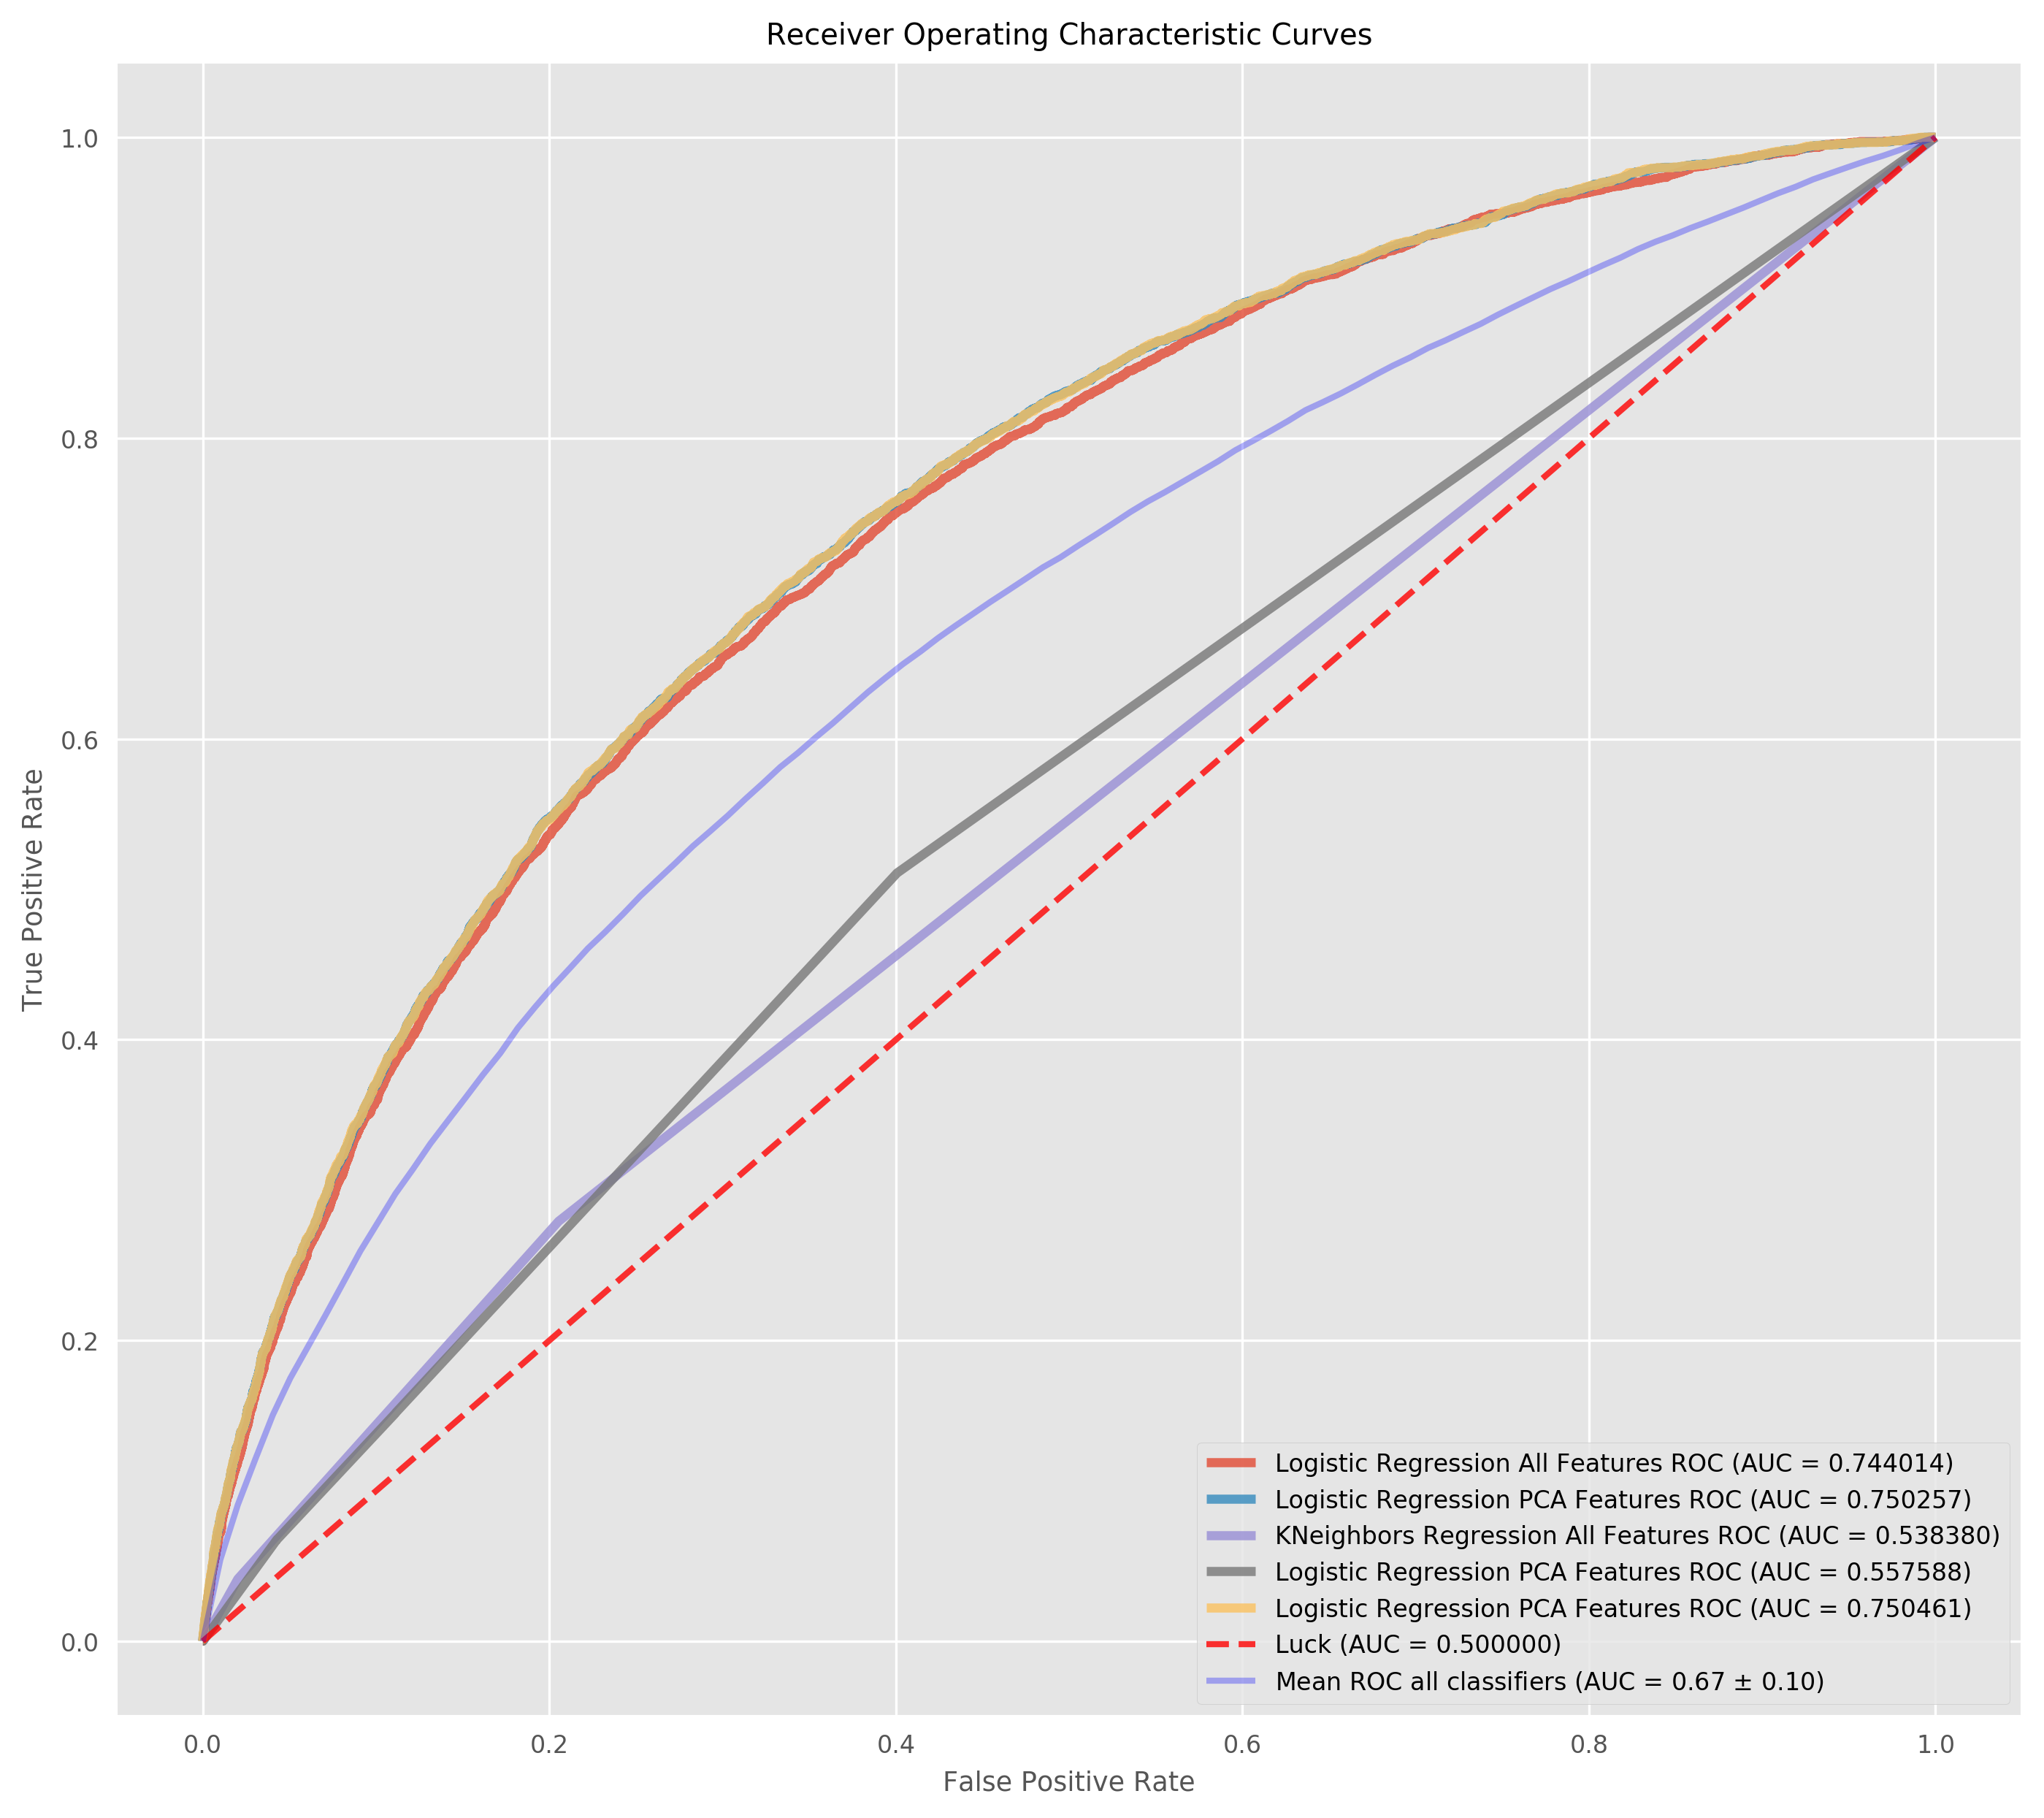

In [71]:
# Display ROC curves of Logistic Regression and KNeighbors with different
# datasets.
vs.plot_roc_curves(y_test, y_score_list, clf_label_list, title='Receiver Operating Characteristic Curves');